Last updated: 26 September 2022

# Helping Abalone Farmers (and Saving Abalone Lives)
**Competition - Abalone Seafood Farming**

## Introduction

For operational and environmental reasons, it is an important to estimate the age of abalone before they go to market. The usual approach involves counting the number of rings in a cross-section of the shell through a microscope. However, this is cumbersome, time-consuming, and to some extent wasteful. It would be more efficient if age could be accurately measured using the physical characteristics of the abalone. Furthermore, if abalone age can be determined without first having to shuck the animal (which kills it), then there would be a number of follow-on benefits, including:

1. The process of farming abalone would be more humane and less wasteful due to not killing animals unnecessarily.
2. Revenue and profits would be increased due to farmers only harvesting the most-profitable animals.

The objective of this report was to:
1. Identify how weight changed with age for each of the sex categories.
2. Determine if it is possible to (accurately) estimate age using physical characteristics.
3. Investigate which physical characteristics are better predictors of age.

## Data
The report used the historical data detailed below for the analysis: ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone in years: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

There were a total of 4,177 observations in this dataset. Missing values had already been removed and the range of the continuous values had been scaled for use with an Artificial Neural Network by dividing by 200. The original units were grams for the weight variables and millimetres for the physical dimensions.

## Method

As was indicated in the introduction, only variables in the dataset that would not require killing the abalone were used in this analysis. That is, shell weight, viscera weight and shucked weight were all droppped at the outset in addition to rings, which was directly related to age.

Once this was done, the data underwent a cleaning process in which it was checked for missing values and unusual/outlier observations. The latter were identified using examination of individual data distributions and Mahalanobis Distance, which can be a more effective approach to multivariate outlier detection compared to using more common metrics such as the interquartile range or z scores. An exploratory data analysis was also conducted, to examine individual variable distributions and relationships between the different variables. Finally, two additional variables were added - one calculating total area and the other calculating volume.

From here, the analysis progressed to determining if a suitable model could be found to estimate abalone age. As age is a discrete variable both a regression and classification approach can be used. In this case, the author decided to treat it as a regression problem. (As an aside, note that treating it as a regression problem would also avoid some of the considerations necessary with any classification problem such how to deal with unbalanced classes in the outcome variable). Candidate models were trained using twice-repeated five-fold cross-validation and their hyperparameters tuned using a racing approach instead of a basic grid search to increase the efficiency of the process. Mean absolute error as r-squared scores were used to assess the performance of the candidate models. Mean squared error was selected over the potentially more common root mean squared error as the latter tends to be more influenced by outliers, and the preliminary data exploration established the presence of these in the dataset. Furthermore, whilst the author eliminated the most prominent outliers, an attempt was made to limit the amount of removed data and hence the authors considered mean absolute error to be the better performance metric for this dataset.

## Summary of Findings and Recommendations

**Findings**
1. The strongest relationship between whole weight and sex was for infant abalone, and it was weakest for female abalone. However, this could have partly been due to the fact that it appears as though abalone reach their maximum weight at around 12 to 15 years of age, but continue to live for much longer.
2. The positive relationships between weight and age appeared to be clearer in general for dry, shell and gut weight, but there was still evidence of a breakpoint in the shell and gut weight variables at around 10 to 15 years.
3. The relationships between age and length, diameter and height appeared to be approximately linear but the relationship with whole weight was clearly non-linear. In addition, the variance in the data points increased as the values of the outcome variable and the explanatory variables increased, which was a strong indication of the presence of heteroscedasticity.
4. The label of the variable "sex" appeared to be a slight misnomer as abalone classified as infants ranged from 2.5 to 22.5 years, and male/female abalone ranged from 4.5 years to 30.5 years.
5. Correlation analysis confirmed the presence of strong relationships between the explanatory variables, which indicated the requirement for either dimension reduction prior to model fitting or regularisation of input variables during model fitting. Both approaches were used in this case.
6. Correlation analysis also confirmed that whilst the overall relationship between each of the explanatory variables and age was only moderate (between 0.54 and 0.56 or 0.59 to 0.68 if considering the natural logarithm of age), this was because the relationship with age after 13.5 years was virtually non-existant.
7. Dimension reduction by principal components confirms the previous findings by indicating that close to 90% of the variability in the data can be explained by just two components.
8. Investigation of a wide range of models indicated that with the inclusion of a indicator variable to flag the change in relationship at 13.5 years, the just the physical characteristics could be used to accurately estimate abalone age (MAE = 0.1, MAPE = 4.3%, r-squared = 76.7% on the test data).
9. Just the age-threshold indicator, diameter and height are sufficient to predict age with reasonable accuracy and relatively little loss in performance compared to the full GAM discussed in point 8 (MAE = 0.1, MAPE = 4.4%, r-squared = 75.3% on the test data).

**Recommendations**
1. Speak to a farmer representative to confirm whether it would be more useful for the age prediction to be exact or the problem should be re-specified to predict different age groups; for example, ring classes 1 to 8, 9 and 10, and 11 on; that is, whether it is more appropriate for age to be modelled as a classification or regression problem.
2. Recommend that the current model be used by farmers to provide an indicative age of abalone.
3. Stress that if farmers are unable to guess with some degree of certainty about whether an abalone is younger or older than 12.5 years that the available data is insufficient to accurately predict age as a regression problem.
4. Determine if environmental information is available and can be added to the dataset; for example, abalone species, location (and hence food availability), bred in captivity or collected from the wild etc.
5. Investigate the weakpoints of the specifications of the final model, particularly with regards to the number of basis functions used and the input features.

## Preliminary Analysis

### Setup

In [1]:
# # rm(list=ls()); gc()

# install.packages(c("glmnet", "earth", "brulee", "keras", "kernlab", "LiblineaR", "bonsai", "ranger", "lightgbm", "rules", "xgboost", "stacks"))
install.packages(c("ggpubr", "ggforce", "viridis", "tidytext", "BiocManager", "bestNormalize", "finetune", "vip", "DALEXtra"))

# # need a separate installation format for mixOmics
BiocManager::install("mixOmics")
# # remotes::install_github("tidymodels/learntidymodels") # github also says can use devtools::install_github("tidymodels/learntidymodels")

Installing ggpubr [0.4.0] ...
	OK [linked cache]
Installing ggforce [0.3.4] ...
	OK [linked cache]
Installing viridis [0.6.2] ...
	OK [linked cache]
Installing tidytext [0.3.4] ...
	OK [linked cache]
Installing BiocManager [1.30.18] ...
	OK [linked cache]
Installing bestNormalize [1.8.3] ...
	OK [linked cache]
Installing finetune [1.0.0] ...
	OK [linked cache]
Installing vip [0.3.2] ...
	OK [linked cache]
Installing DALEXtra [2.2.1] ...
	OK [linked cache]


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'mixOmics'”
Old packages: 'arrow', 'cli', 'crul', 'desc', 'dplyr', 'DT', 'future',
  'future.apply', 'gargle', 'geojsonio', 'gert', 'gh', 'gitcreds', 'gtable',
  'httpuv', 'igraph', 'lifecycle', 'Matrix', 'MatrixModels', 'modeldata',
  'openssl', 'paws.common', 'pointblank', 'progressr', 'raster', 'renv',
  'reticulate', 'rlang', 'RSQLite', 'rversions', 'terra', 'tidyr', 'tinytex',
  'xfun', 'yardstick', 'zip', 'zoo'



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'mixOmics'”


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




Installing package into ‘/home/repl/renv/library/R-4.2/x86_64-pc-linux-gnu’
(as ‘lib’ is unspecified)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://packagemanager.rstudio.com/all/__linux__/focal/latest




In [2]:
# data wrangling
library(plyr)
library(tidyverse)
library(ggpubr)
library(cowplot)
library(viridis)
library(GGally)
library(reshape2)
library(tidytext)

# modelling
library(tidymodels)
library(ggforce)
library(bestNormalize)
library(finetune)

# library(baguette)
# library(rules)
# library(bonsai)

# feature importance
library(vip)
library(DALEXtra)

# ensembling - model stacking
# library(stacks)

# parallel processing
# library(doParallel)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate



Attaching package: ‘cowplot’

In [3]:
# miscellaneous functions etc
# function to define a reversed 'not in' operator
'%!in%' <- function(x, y)!('%in%'(x, y))

# customised ggplot2 theme
theme_report <- function() {
  theme_classic() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14),
        plot.title = element_text(size = 16),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 14))
  }

### Initial look at the data

In [4]:
abalone <- readr::read_csv('data/abalone.csv', show_col_types = FALSE, col_types = "fdddddddid")
head(abalone)

sex length diameter height whole_wt shucked_wt viscera_wt shell_wt rings age 
1 M   0.455  0.365    0.095  0.5140   0.2245     0.1010     0.150    15    16.5
2 M   0.350  0.265    0.090  0.2255   0.0995     0.0485     0.070     7     8.5
3 F   0.530  0.420    0.135  0.6770   0.2565     0.1415     0.210     9    10.5
4 M   0.440  0.365    0.125  0.5160   0.2155     0.1140     0.155    10    11.5
5 I   0.330  0.255    0.080  0.2050   0.0895     0.0395     0.055     7     8.5
6 I   0.425  0.300    0.095  0.3515   0.1410     0.0775     0.120     8     9.5

In [5]:
summary(abalone)

 sex          length         diameter          height          whole_wt     
 M:1528   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 F:1307   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 I:1342   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
   shucked_wt       viscera_wt        shell_wt          rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.00

In [6]:
glimpse(abalone)

Rows: 4,177
Columns: 10
$ sex        <fct> M, M, F, M, I, I, F, F, M, F, F, M, M, F, F, M, I, F, M, M,…
$ length     <dbl> 0.455, 0.350, 0.530, 0.440, 0.330, 0.425, 0.530, 0.545, 0.4…
$ diameter   <dbl> 0.365, 0.265, 0.420, 0.365, 0.255, 0.300, 0.415, 0.425, 0.3…
$ height     <dbl> 0.095, 0.090, 0.135, 0.125, 0.080, 0.095, 0.150, 0.125, 0.1…
$ whole_wt   <dbl> 0.5140, 0.2255, 0.6770, 0.5160, 0.2050, 0.3515, 0.7775, 0.7…
$ shucked_wt <dbl> 0.2245, 0.0995, 0.2565, 0.2155, 0.0895, 0.1410, 0.2370, 0.2…
$ viscera_wt <dbl> 0.1010, 0.0485, 0.1415, 0.1140, 0.0395, 0.0775, 0.1415, 0.1…
$ shell_wt   <dbl> 0.150, 0.070, 0.210, 0.155, 0.055, 0.120, 0.330, 0.260, 0.1…
$ rings      <int> 15, 7, 9, 10, 7, 8, 20, 16, 9, 19, 14, 10, 11, 10, 10, 12, …
$ age        <dbl> 16.5, 8.5, 10.5, 11.5, 8.5, 9.5, 21.5, 17.5, 10.5, 20.5, 15…


### The relationship between weight, age and sex

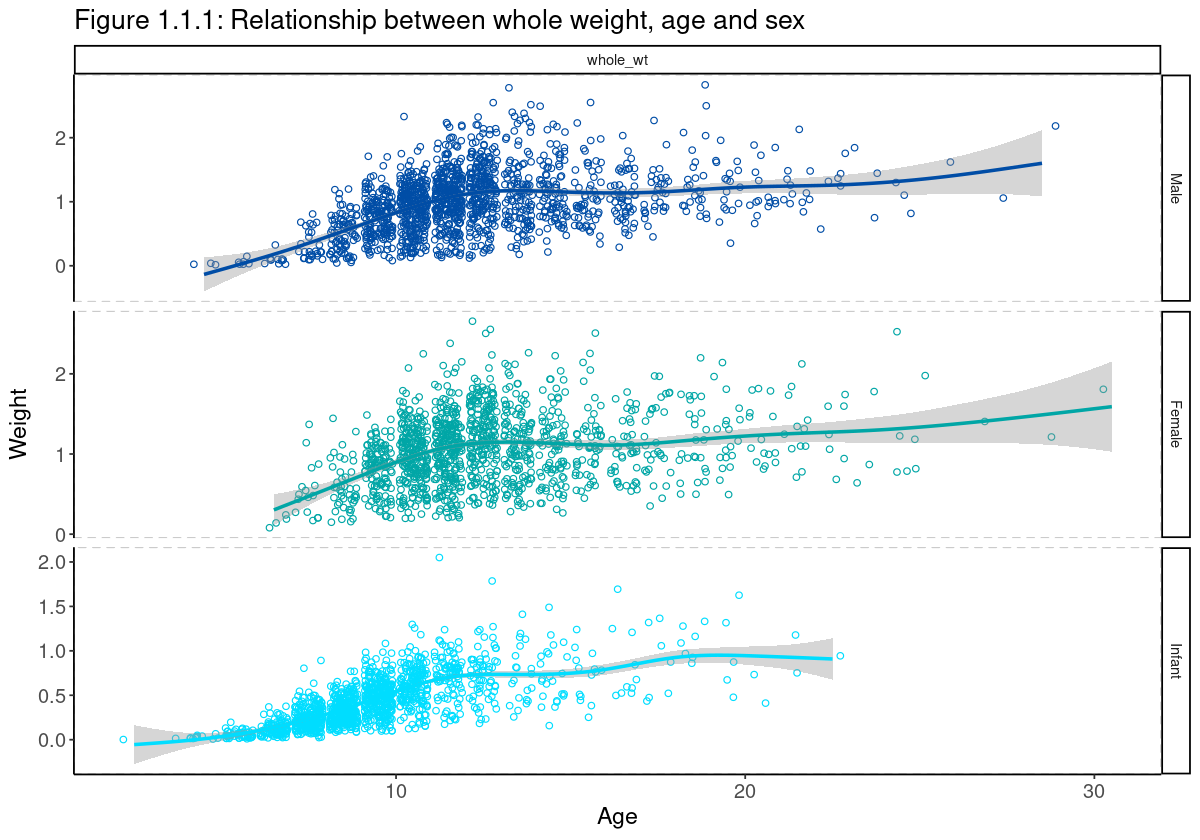

In [7]:
# extract only necessary variables
wt_vars <- abalone %>% select(age, sex, ends_with("_wt"))
var_labels <- c("Age", "Sex", "Whole weight", "Shucked weight", "Viscera (Gut) weight", "Dry shell weight")

# pivot into a long-format
wt_vars <- pivot_longer(wt_vars, cols = whole_wt:shell_wt, names_to = "var", values_to = "value")

options(repr.plot.width=10, repr.plot.height=7)
wt_vars %>% 
  filter(var == "whole_wt") %>%
  ggplot(aes(x = age, y = value, col = sex)) +
    geom_jitter(shape = 21) +
    stat_smooth(formula = y ~ s(x, bs = "cs"), method = "gam") +
    facet_grid(sex ~ var, labeller = labeller(sex = c(M = "Male", F = "Female", I = "Infant")), scales = "free_y") +
    scale_colour_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
    labs(x = "Age",
         y = "Weight",
         title = "Figure 1.1.1: Relationship between whole weight, age and sex") +
  theme_report() +
  theme(panel.border = element_rect(linetype = "dashed", colour = "gray", fill = NA),
        legend.position = "none")

In order to answer this question, each of the four weight variables were examined individually. With respect to whole weight, visual inspection together with calculation of pearson and spearman correlation coefficients indicated that there was a positive relationship for each sex, but it was strongest for infant abalone (approximately 0.70 to 0.77) and weakest for female abalone (approximately 0.27 to 0.29). Furthermore, the plots indicated that the weaker coefficients for males and females could be due to the fact that there is a positive relationship up until around 12 to 15 years of age, after which there appears to be no relationship. That is, abalone reach close to their maximum weight at around 12 to 15 years and the rate of weight gain thereafter was much slower.

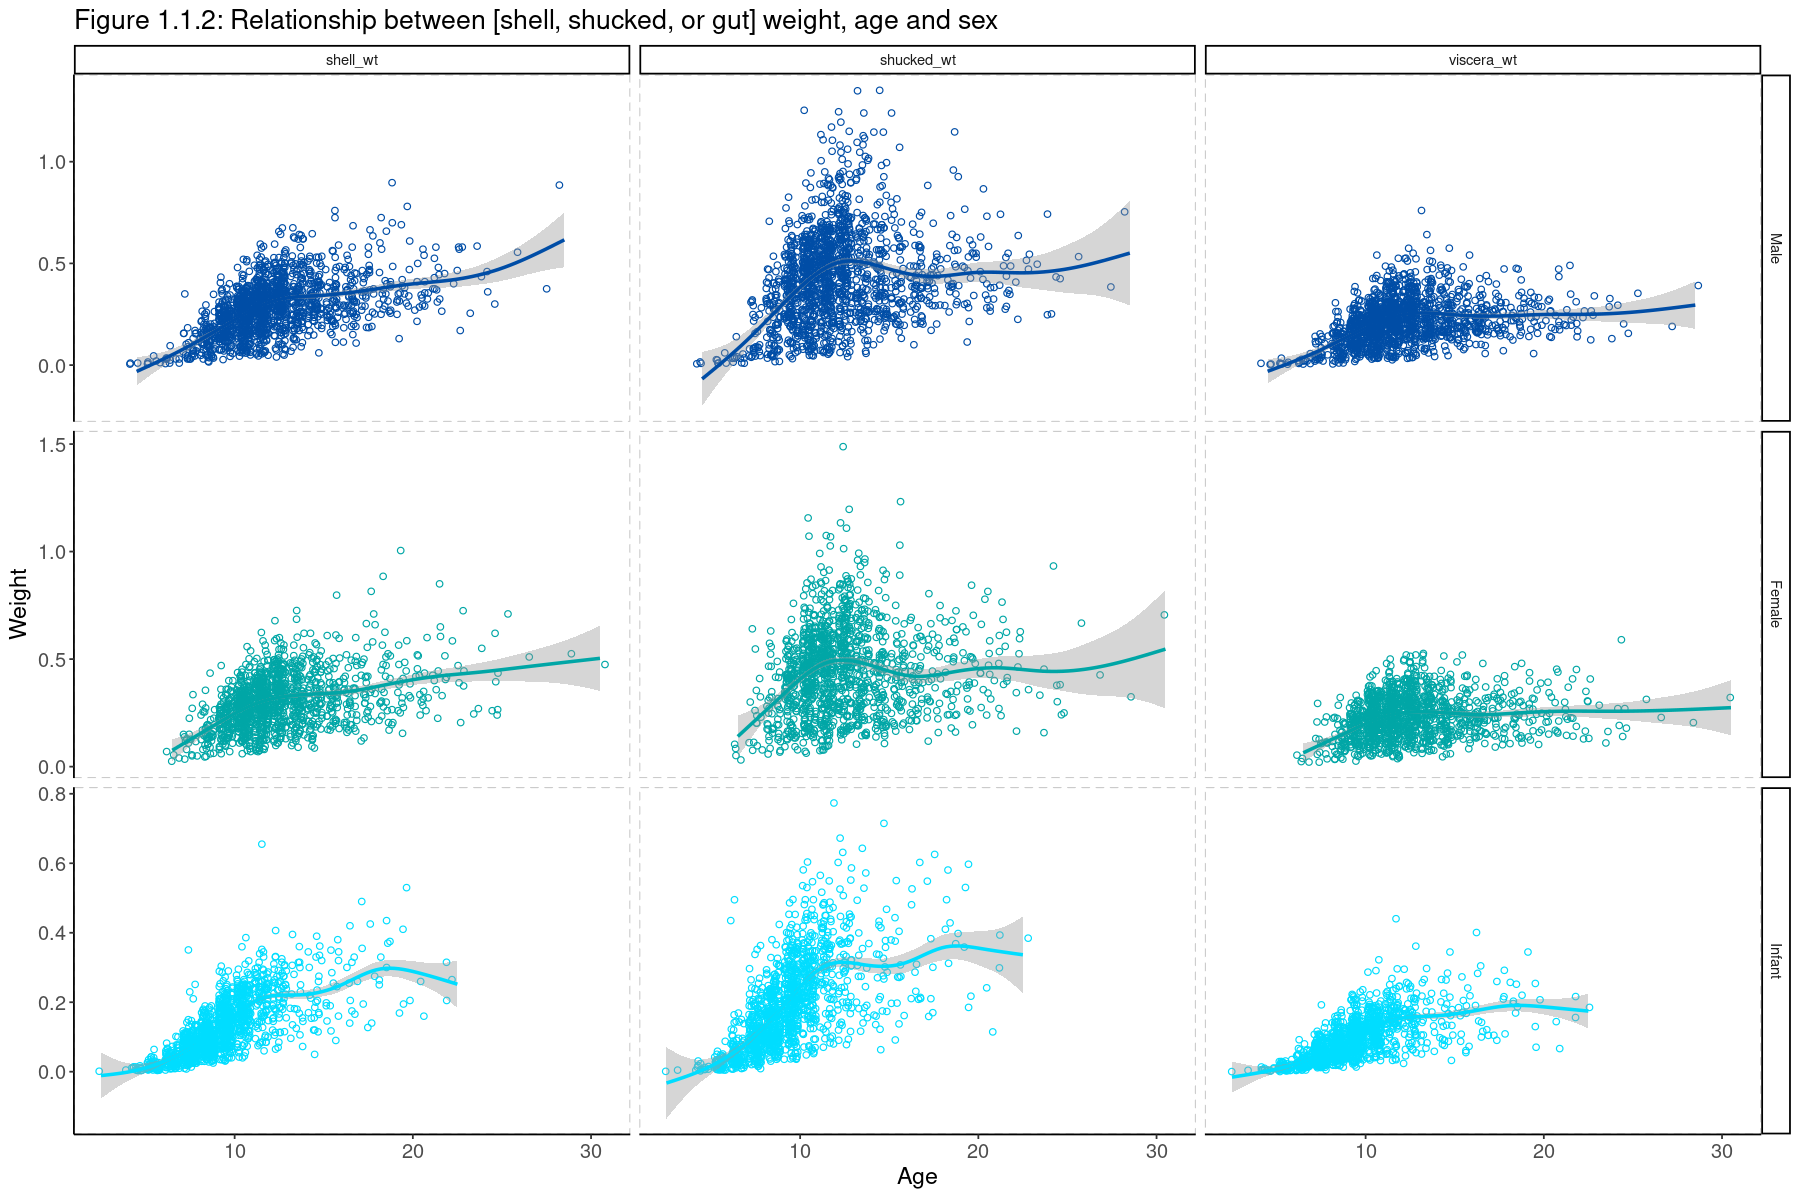

In [8]:
options(repr.plot.width=15, repr.plot.height=10)
wt_vars %>% 
  filter(var != "whole_wt") %>%
ggplot(aes(x = age, y = value, col = sex)) +
  geom_jitter(shape = 21) +
  stat_smooth(formula = y ~ s(x, bs = "cs"), method = "gam") +
  facet_grid(sex ~ var, labeller = labeller(sex = c(M = "Male", F = "Female", I = "Infant")), scales = "free_y") +
  scale_colour_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
  labs(x = "Age",
       y = "Weight",
       title = "Figure 1.1.2: Relationship between [shell, shucked, or gut] weight, age and sex") +
  theme_report() +
  theme(panel.border = element_rect(linetype = "dashed", colour = "gray", fill = NA),
        legend.position = "none")

With respect to dry, shell and gut weight, the positive relationships between weight and age appeared to be clearer with a possible exception of shucked weight for females. That being said, there was still some indication of a similar knot to that of whole weight at around 10 to 15 years for male and female shell and gut weights.

### Overall relationships

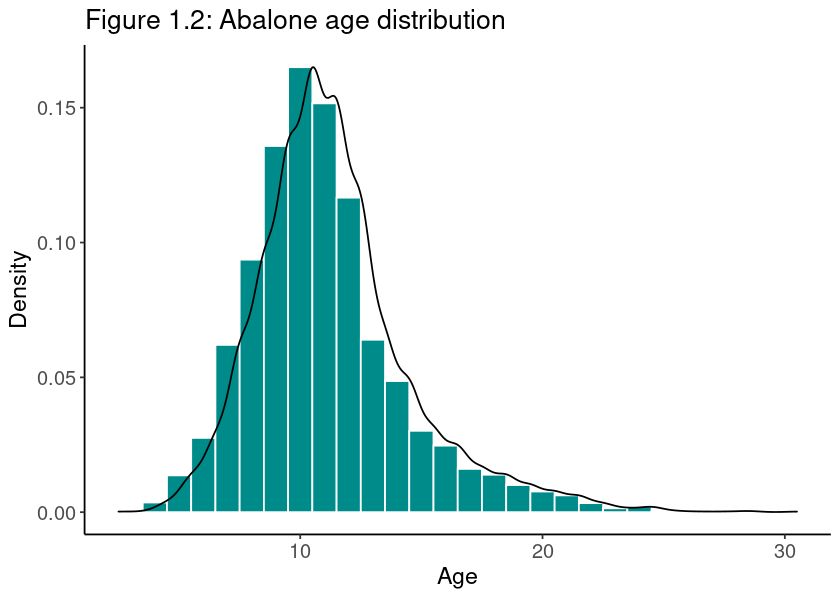

In [9]:
abalone <- abalone %>%
  # remove variables won't be using
  select(-c(rings, shucked_wt, viscera_wt, shell_wt)) %>%
  # add some variables
  # mutate(area = length * 0.5 * diameter * 0.5 * pi,
  #        volume = 4/3 * pi * length * 0.5 * diameter * 0.5 * height * 0.5) %>%
  # remove some obvious height errors
  filter(height <= 0.3)

# check the distribution of the outcome variable
options(repr.plot.width=7, repr.plot.height=5)
ggplot(abalone, aes(age)) +
  geom_histogram(aes(y = ..density..), binwidth = 1.0, fill = "dark cyan", col = "white", bins = 50) +
  geom_density(col = "black", adjust = 1.25) +
  labs(x = "Age", 
       y = "Density", 
       title = "Figure 1.2: Abalone age distribution") +
  theme_report()

The outcome or target variable is a discrete variable, which means that it can be modelled as either a classification or regression problem. In addition, it appears as though it is approximately normally distributed, albeit with a very slight right-skew.

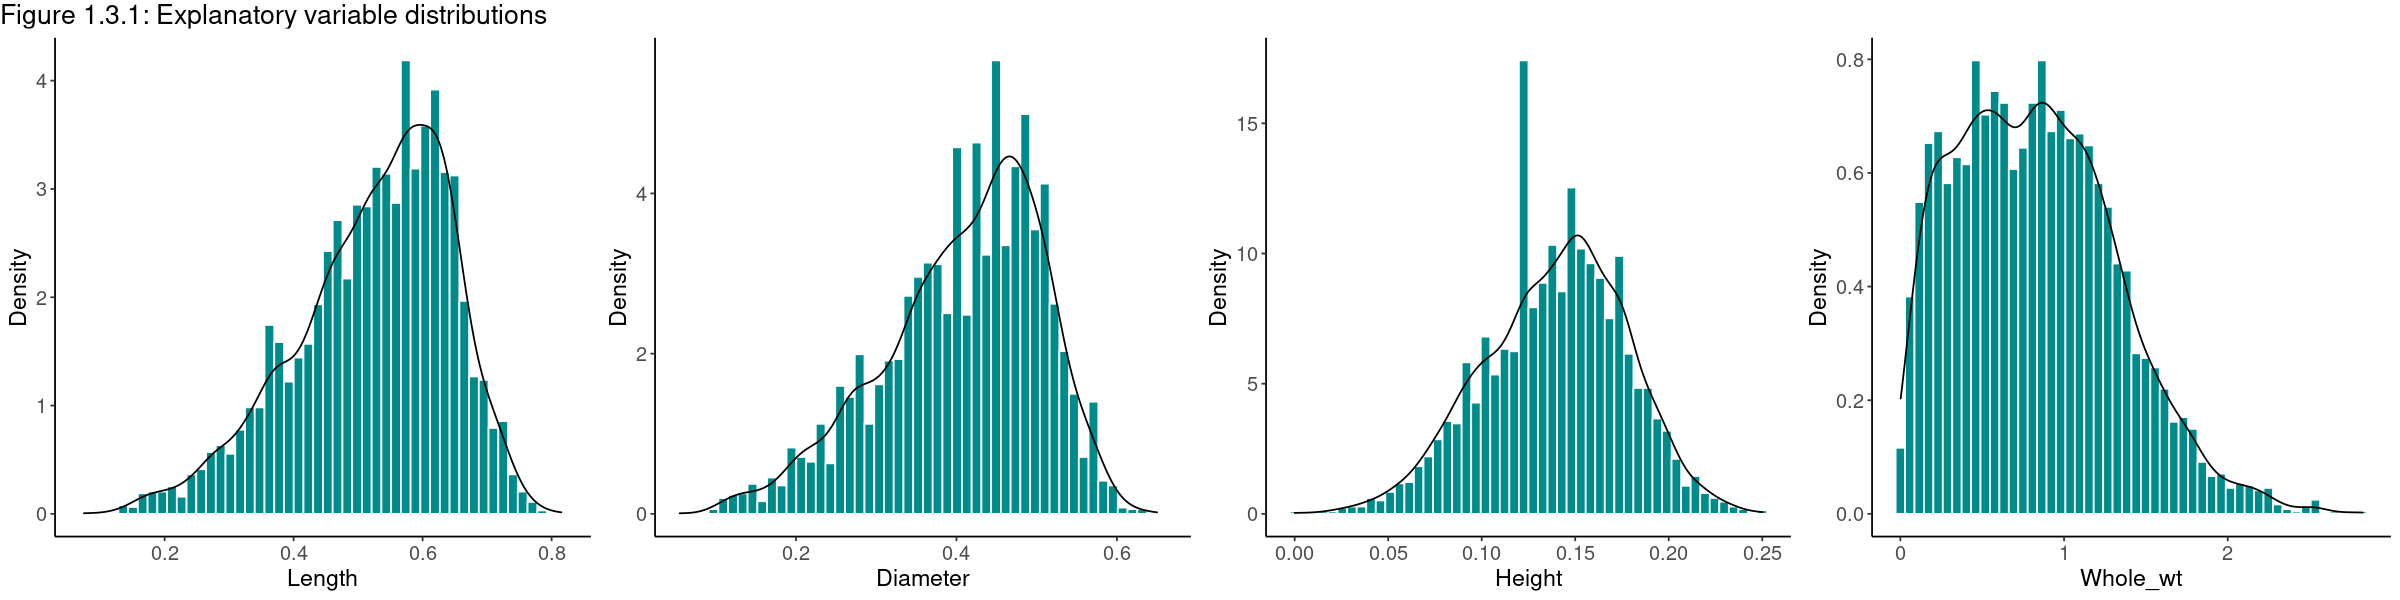

In [10]:
# check the distributions of the explanatory variables
num_vars <- abalone %>% 
  select_if(is.numeric) %>%
  select(-age)
num_vars <- cbind(age = abalone$age, num_vars) # just so it's at the start

var_labels <- colnames(num_vars)
nums <- seq(2, ncol(num_vars), 1)
pltnames <- paste0("p", nums-1)
evars <- colnames(num_vars)[nums]

evar_distplot <- function(evar, i) {
  ggplot(abalone, aes(.data[[evar]])) +
    geom_histogram(aes(y = ..density..), fill = "dark cyan", col = "white", bins = 50) +
    geom_density(col = "black") +
    labs(x = str_to_title(evars[i-1]),
         y = "Density") +
    theme_report()
  }

plot_list <- map2(evars, nums, evar_distplot)
legend <- get_legend(evar_distplot(evars[1], 1))

options(repr.plot.width=20, repr.plot.height=5)
plot_row <- ggpubr::ggarrange(plotlist = plot_list, nrow = 1)
title <- ggdraw() + draw_label("Figure 1.3.1: Explanatory variable distributions", x = 0, hjust = 0, size = 16)
plot_grid(title, plot_row, ncol = 1, rel_heights = c(0.05, 1))

Each of the distributions of the numeric variables are skewed, which indicates that some type of transformation may need to be applied at the modelling stage depending on the candidate algorithm as different algorithms have different pre-processing requirements.

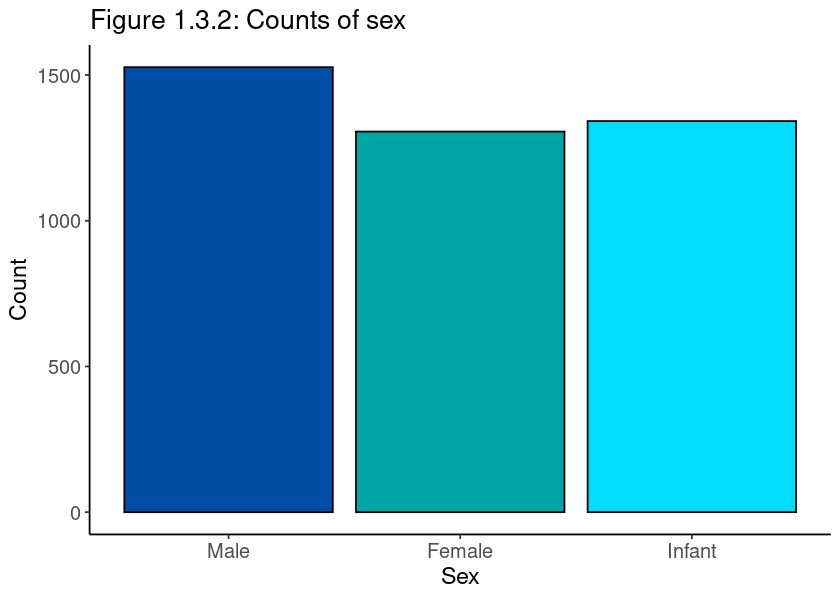

In [11]:
# check the distribution of sex
options(repr.plot.width=7, repr.plot.height=5)
ggplot(abalone, aes(sex, fill = sex)) +
  geom_bar(col = "black") +
  scale_x_discrete(labels = c("Male", "Female", "Infant")) +
  guides(fill = "none") +
  labs(x = "Sex",
       y = "Count",
       title = "Figure 1.3.2: Counts of sex") +
  scale_fill_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
  theme_report()

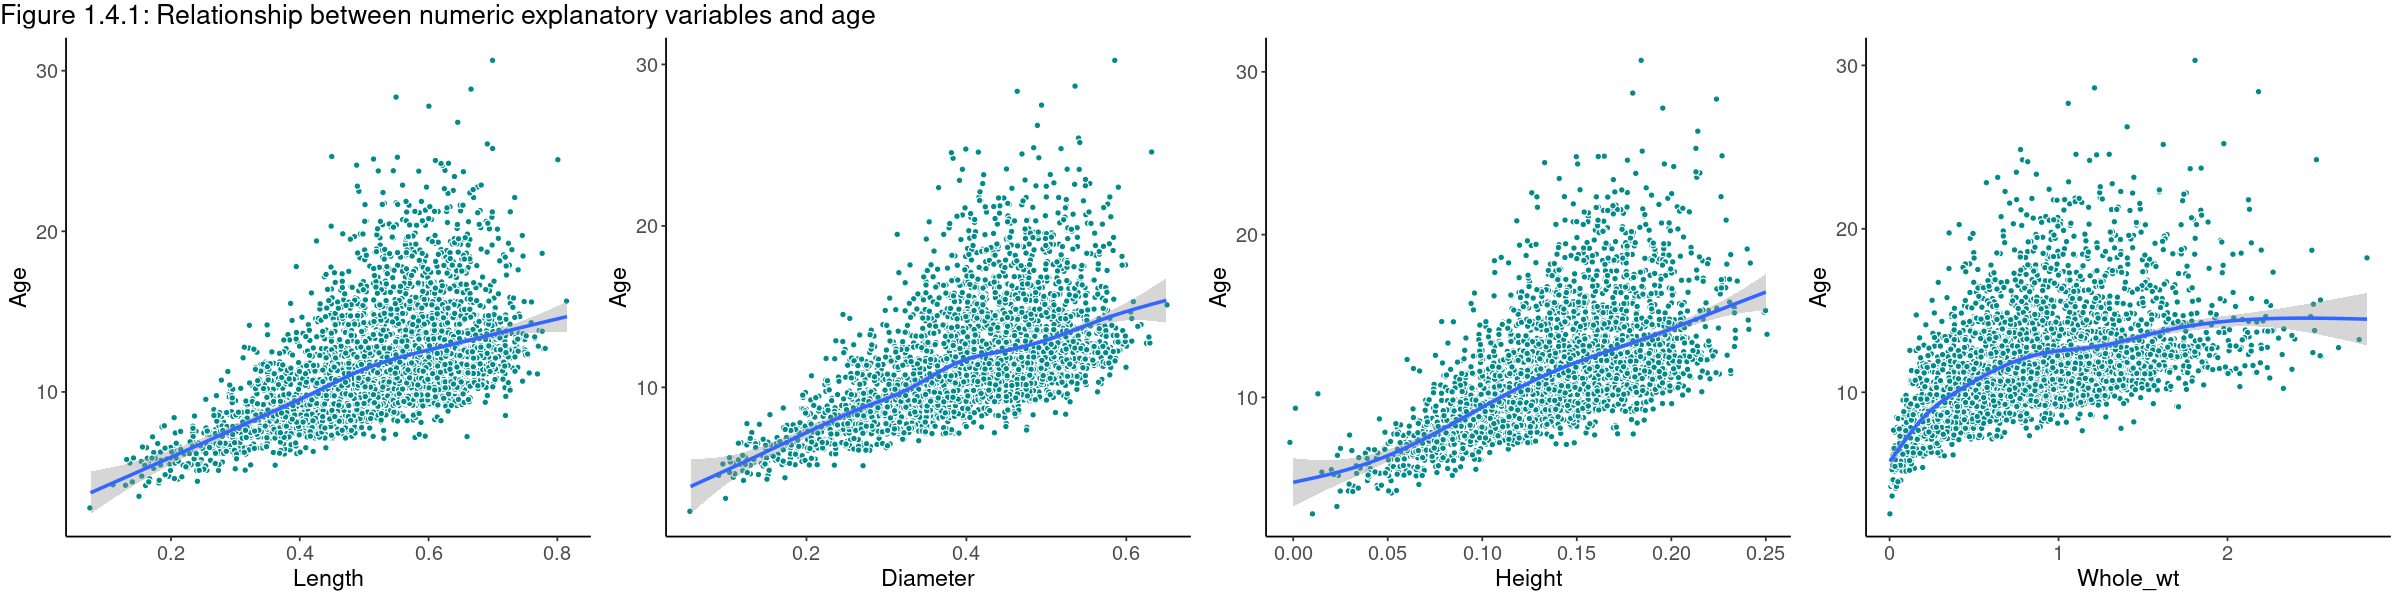

In [12]:
# check the relationships between each of the numeric explanatory variables and age
nums <- seq(2, ncol(num_vars), 1)
pltnames <- paste0("p", nums)
evars <- colnames(num_vars)[nums]

evar_scplot <- function(evar, i) {
  ggplot(num_vars, aes(x = .data[[evar]], y = age)) +
    geom_jitter(shape = 21, fill = "dark cyan", colour = "white") +
    stat_smooth(formula = y ~ s(x, bs = "cs"), method = "gam") +
    labs(x = str_to_title(evars[i-1]),
         y = "Age") +
    theme_report()
  }

plot_list <- map2(evars, nums, evar_scplot)

options(repr.plot.width=20, repr.plot.height=5)
plot_row <- ggarrange(plotlist = plot_list, nrow = 1)
title <- ggdraw() + draw_label("Figure 1.4.1: Relationship between numeric explanatory variables and age", x = 0, hjust = 0, size = 16)
plot_grid(title, plot_row, ncol = 1, rel_heights = c(0.05, 1))

It appears as though the relationships between age and length, diameter and possibly height are approximately linear, but not whole weight. Also note how the variance increases as the value of both the explanatory and dependent variables increase - this is a strong indication of heteroscedasticity, which will need to be adjusted for with any linear regression models. Some of the most common approaches include redefining the dependent variable (for example, from a level value to a rate, using weighted regression, or transforming the dependent variable).

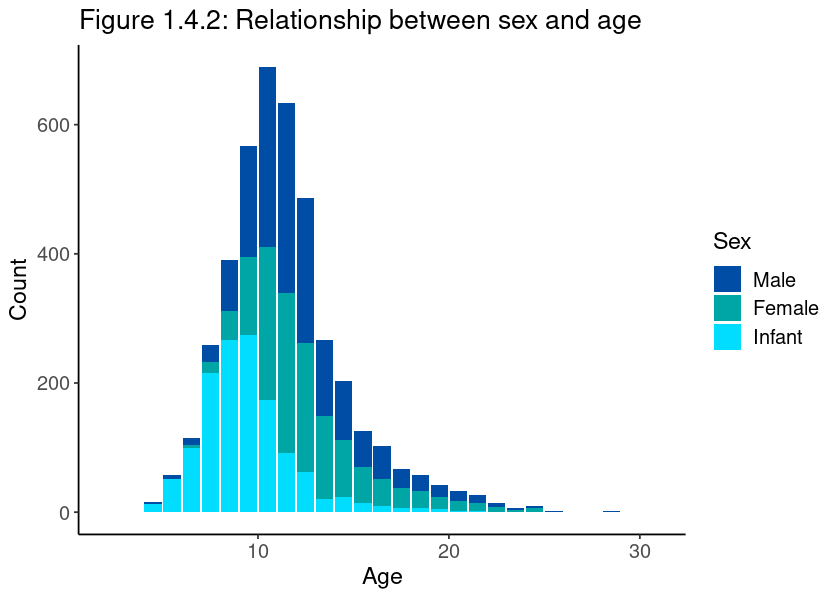

In [13]:
# check the relationship between age and sex
options(repr.plot.width=7, repr.plot.height=5)
ggplot(abalone, aes(x = age, fill = sex)) +
  geom_bar() +
  labs(x = "Age",
       y = "Count",
       title = "Figure 1.4.2: Relationship between sex and age") +
  scale_fill_manual(name = "Sex",
                    labels = c("Male", "Female", "Infant"),
                    values = c("#004da6", "#00a6a6", "#00ddff")) +
  theme_report()

What is really interesting here is that there is no distinct cut-off between male/female (which are presumably adult) abalone and infant abalone. In fact, the oldest "infant" abalone are 22.5 years, the youngest male abalone are 4.5 years, and the youngest female abalone are 6.5 years. In general, this suggests that perhaps a better system should be devised to classify the abalone into these three groups, or remove the infant classification altogether and have "unknown" when sex is too hard to determine.

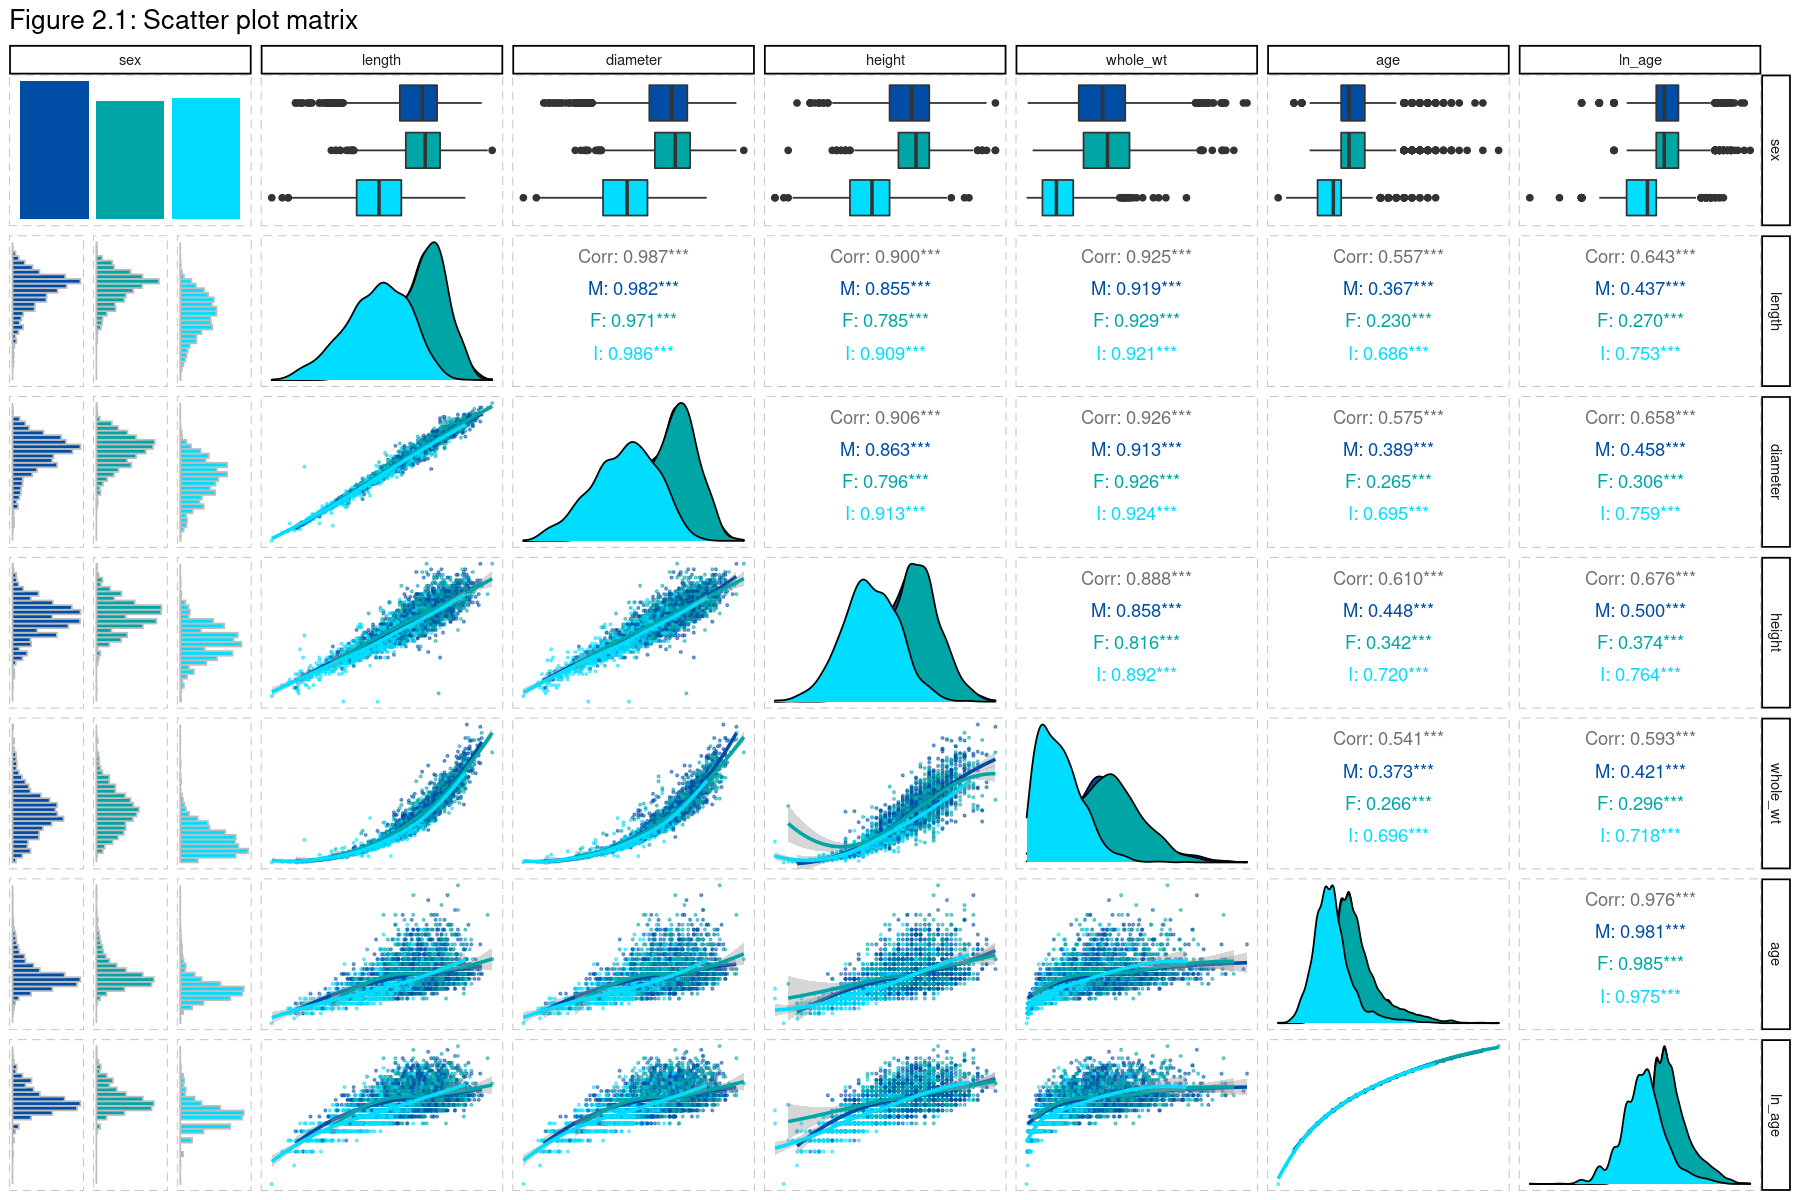

In [14]:
abalone <- abalone %>%
  # rearranging the variables so age is at the end
  select(sex, length, diameter, height, whole_wt, age) %>%
  mutate(ln_age = log(age))

options(repr.plot.width=15, repr.plot.height=10)
ggpairs(abalone, aes(col = sex), axisLabels = "none",
        #upper = list(continuous = wrap("cor", method = "spearman")),
        lower = list(continuous = wrap(ggally_smooth_loess, alpha = 0.5, size = 0.5),
                     combo = wrap(ggally_facethist, bins = 30, col = "gray"))) +
  scale_colour_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
  scale_fill_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
  labs(title = "Figure 2.1: Scatter plot matrix") +
  theme_report() +
  theme(panel.border = element_rect(linetype = "dashed", colour = "gray", fill = NA))

This plot confirms some of the earlier observations regarding the presence of non-linear relationships. It also indicates the presence of some unusual observations, but given that the dataset is reasonably small, they will be retained for now. It also does one more thing - indicating that there are strong relationships between some of the explanatory variables. This needs to be noted as it will bias the results of certain algorithms such as linear regression and indicates the possible need to use some sort of dimensionality reduction in the preprocessing or regularisation in the model itself. Finally, note the reduced heteroscedasticity with the dependent variable using the natural logarithm of age rather than the raw value of age as indicated by the reduced amount of fanning in the values as the value of the independent variable increases.

### Breakpoint investigation

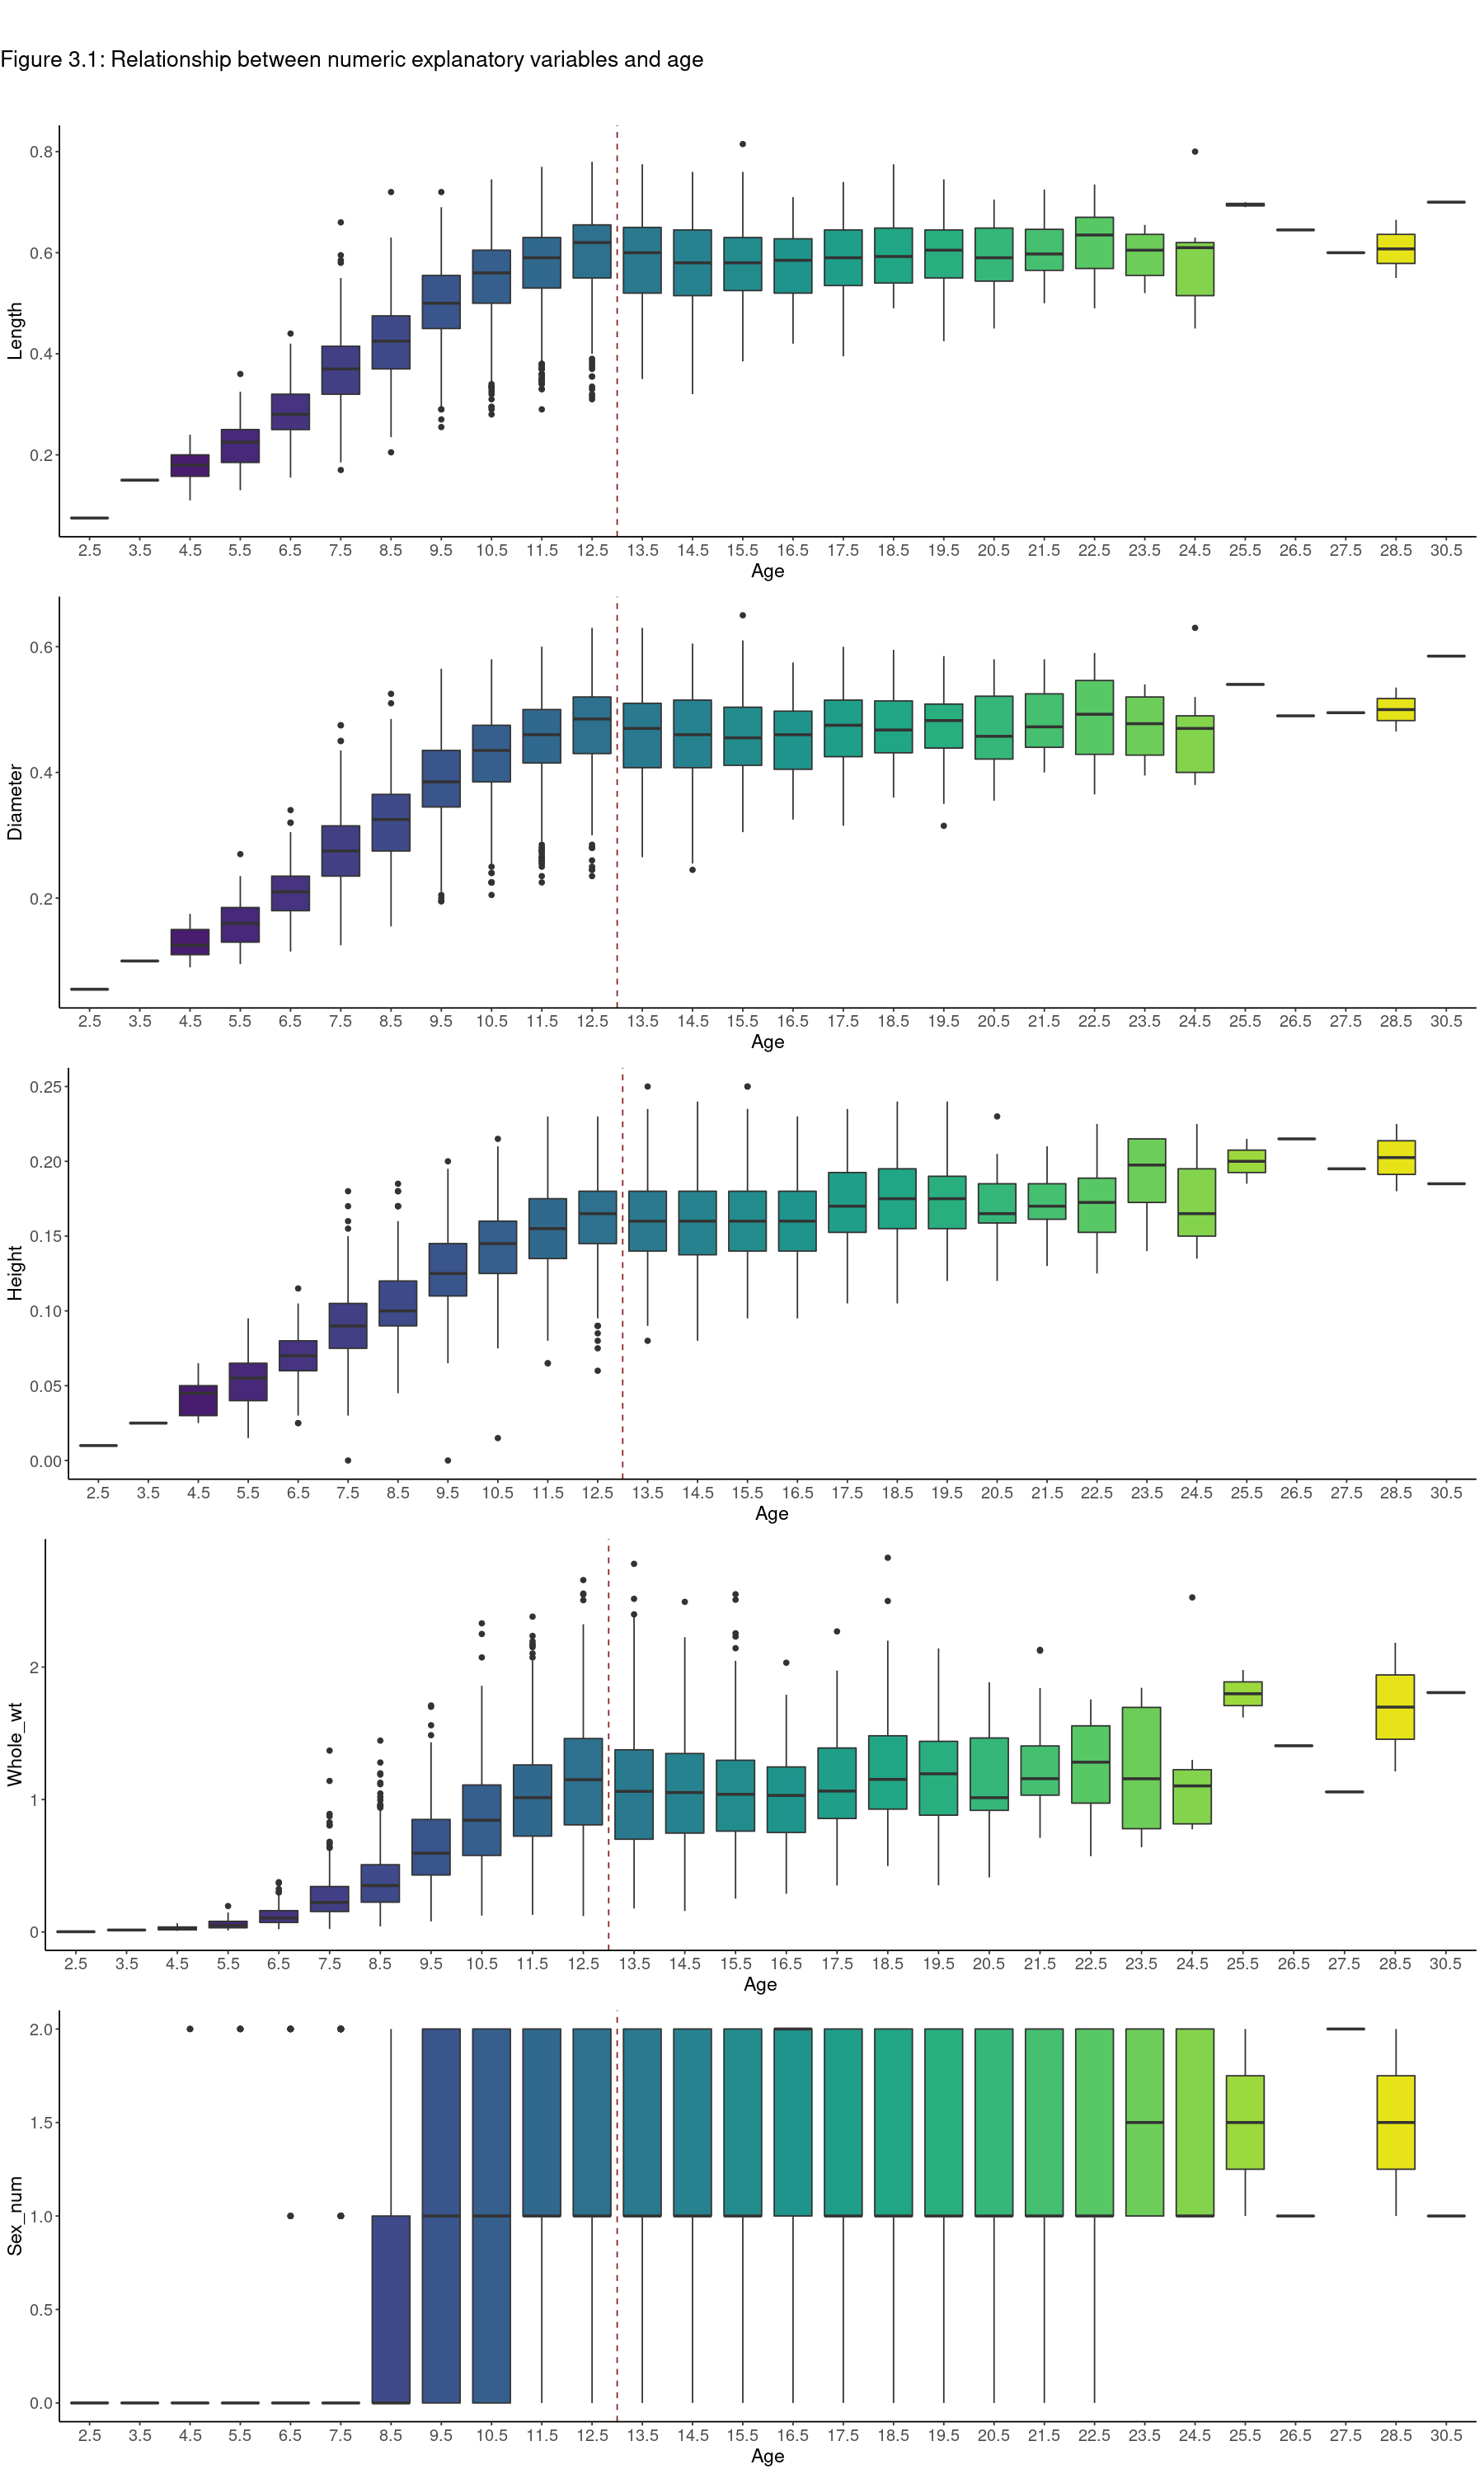

In [15]:
# convert sex to a numeric variable
abalone$sex_num = ifelse(abalone$sex == "M", 2, ifelse(abalone$sex == "F", 1, 0))

num_vars <- abalone %>% 
  select_if(is.numeric) %>%
  dplyr::select(-c(age, ln_age))
num_vars <- cbind(age = abalone$age, num_vars) # just so it's at the start

# plots
nums <- seq(2, ncol(num_vars), 1)
pltnames <- paste0("p", nums)
evars <- colnames(num_vars)[nums]

evar_distplot <- function(evar, i) {
  ggplot(num_vars, aes(x = as.factor(age), y = .data[[evar]], fill = as.factor(age))) +
    geom_boxplot() +
    geom_vline(xintercept = 11.5, col = "brown4", linetype = "dashed") +
    guides(fill = "none") +
    scale_fill_viridis_d() +
    labs(x = "Age",
         y = str_to_title(evars[i-1])) +
    theme_report()
  }

plot_list <- map2(evars, nums, evar_distplot)

options(repr.plot.width=15, repr.plot.height=25)
plot_row <- ggarrange(plotlist = plot_list, ncol = 1)
title <- ggdraw() + draw_label("Figure 3.1: Relationship between numeric explanatory variables and age", x = 0, hjust = 0, size = 16)
plot_grid(title, plot_row, ncol = 1, rel_heights = c(0.05, 1))

These plots strongly suggest that physical characteristics are related to age only up to a specific point (around 12.5 years in this dataset). After that, other unknown environmental factors are likely more important. It also reiterates the point that "sex" is not a reliable indicator of an infant vs an adult abalone as "infants" are present all the way up to 22.5 years, and "adults" start appearing at 4.5 years.

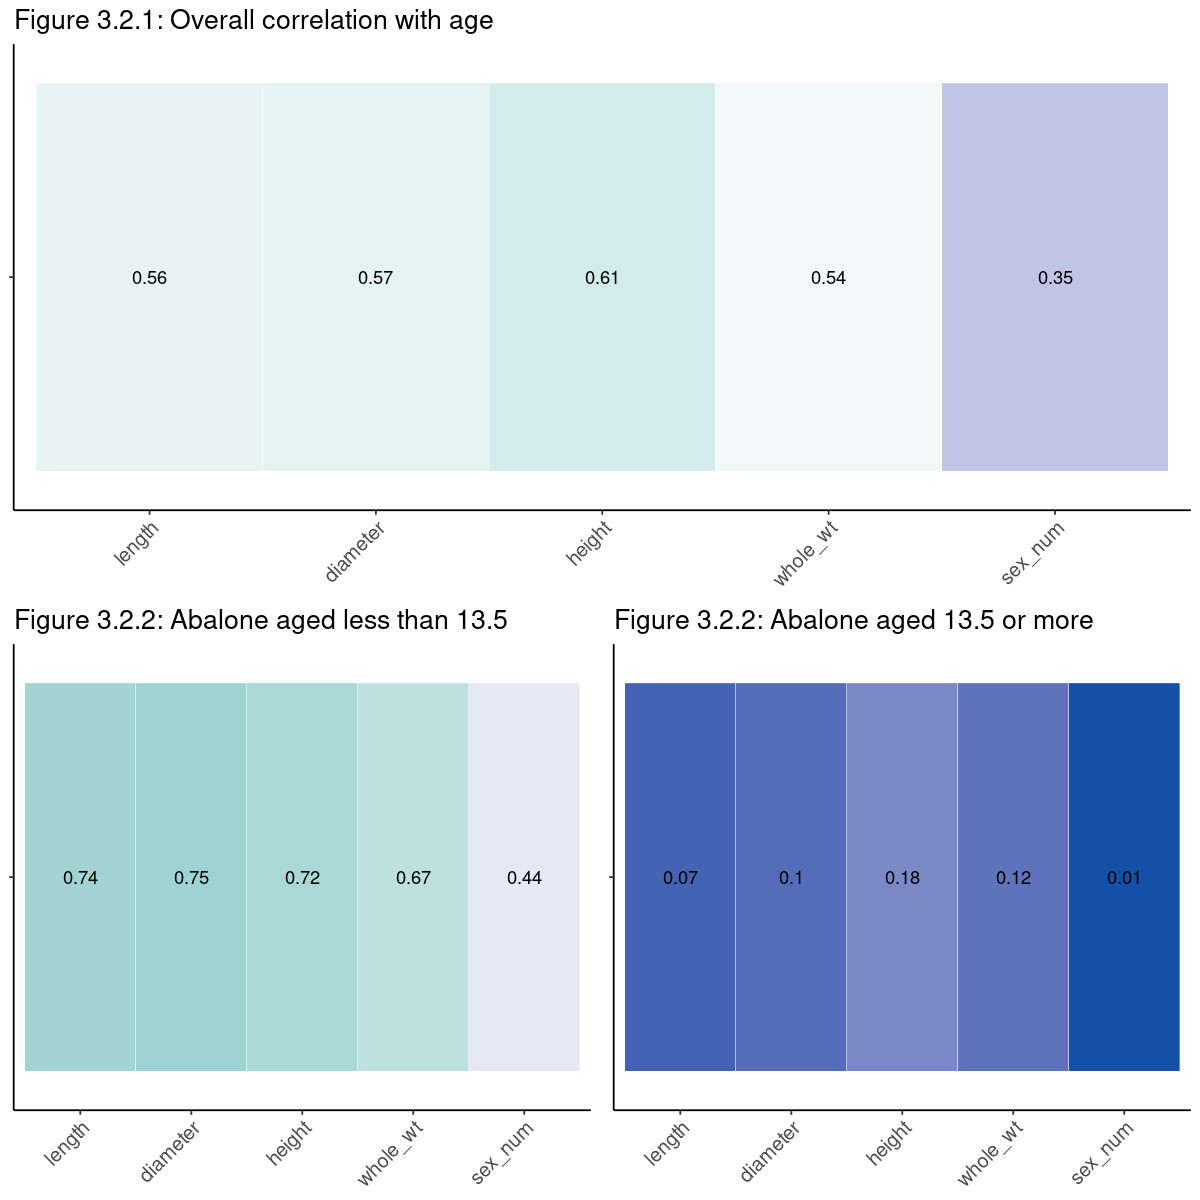

In [16]:
cor_mat <- round(cor(num_vars), 2) %>%
  melt() %>%
  filter(Var2 == "age" & Var1 != "age")

p1 <- ggplot(cor_mat, aes(Var1, Var2, fill = value, label = value)) +
  geom_tile(col = "white") +
  geom_text() +
  labs(x = NULL, y = NULL,
       title = "Figure 3.2.1: Overall correlation with age") +
  guides(fill = "none") +
  scale_fill_gradient2(low = "#004da6", high = "#00a6a6", mid = "white", midpoint = 0.5, , limits = c(0,1)) +
  theme_report() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        axis.text.y = element_blank())

cor_mat <- num_vars %>%
  filter(age <= 12.5) %>%
  cor() %>%
  melt() %>%
  mutate(value = round(value, 2)) %>%
  filter(Var2 == "age" & Var1 != "age")

p2 <- ggplot(cor_mat, aes(Var1, Var2, fill = value, label = value)) +
  geom_tile(col = "white") +
  geom_text() +
  labs(x = NULL, y = NULL,
       title = "Figure 3.2.2: Abalone aged less than 13.5") +
  guides(fill = "none") +
  scale_fill_gradient2(low = "#004da6", high = "#00a6a6", mid = "white", midpoint = 0.5, , limits = c(0,1)) +
  theme_report() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        axis.text.y = element_blank())

cor_mat <- num_vars %>%
  filter(age > 12.5) %>%
  cor() %>%
  melt() %>%
  mutate(value = round(value, 2)) %>%
  filter(Var2 == "age" & Var1 != "age")

p3 <- ggplot(cor_mat, aes(Var1, Var2, fill = value, label = value)) +
  geom_tile(col = "white") +
  geom_text() +
  labs(x = NULL, y = NULL,
       title = "Figure 3.2.2: Abalone aged 13.5 or more") +
  guides(fill = "none") +
  scale_fill_gradient2(low = "#004da6", high = "#00a6a6", mid = "white", midpoint = 0.5, , limits = c(0,1)) +
  theme_report() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        axis.text.y = element_blank())

options(repr.plot.width=10, repr.plot.height=10)
ggarrange(p1, 
          ggarrange(p2, p3, ncol = 2), nrow = 2)

### Dimensionality Reduction - Principal Components Analysis

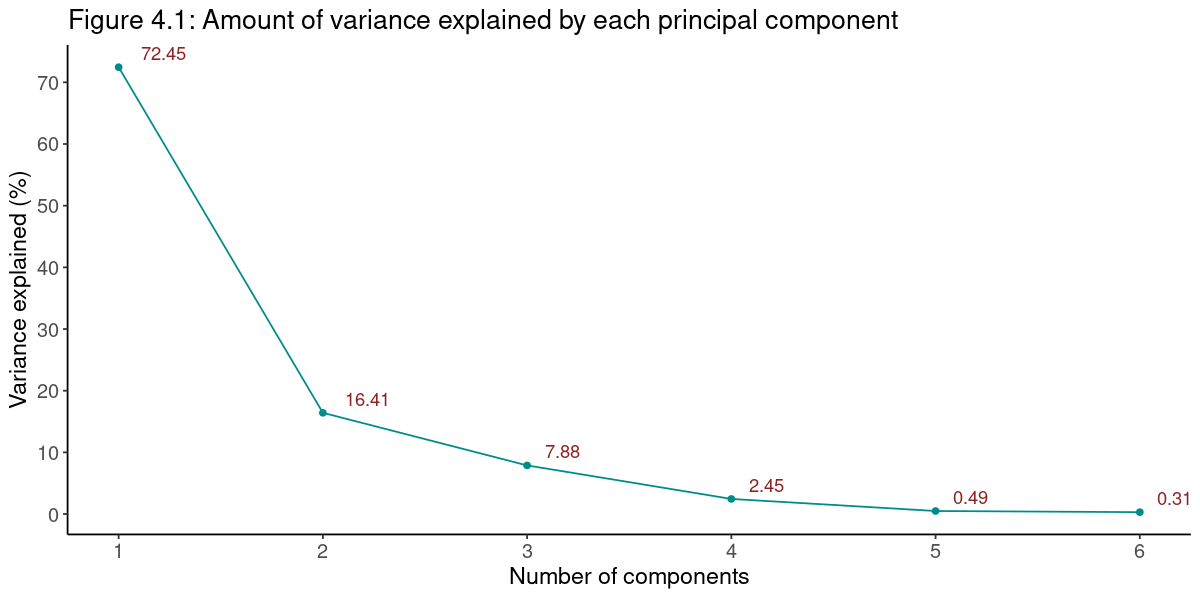

In [17]:
pca_data <- abalone %>% 
  dplyr::select(-c(age, ln_age, sex_num))
pca_data <- cbind(age = abalone$age, pca_data)

pca_recipe <- recipe(~., data = pca_data) %>%
  update_role(age, new_role = "id") %>%
  bestNormalize::step_orderNorm(all_numeric_predictors()) %>%
  step_dummy(all_nominal()) %>%
  step_normalize(all_predictors())

pca_mod <- pca_recipe %>%
  step_pca(all_predictors(), num_comp = 8)

# variance explained
var_explained <- tidy(pca_mod %>% prep(), number = 4, type = "variance")
# variable loadings
var_loadings <- tidy(pca_mod %>% prep(), number = 4, type = "coef")

options(repr.plot.width=10, repr.plot.height=5)
var_explained %>%
  filter(terms == "percent variance") %>%
  ggplot(aes(x = component, y = value, label = round(value, 2))) +
  geom_line(col = "dark cyan") +
  geom_point(col = "dark cyan") +
  geom_text(hjust = -0.5, vjust = -0.5, col = "brown4") +
  scale_x_continuous("Number of components", breaks = seq(1,8,1)) +
  scale_y_continuous("Variance explained (%)", breaks = seq(0,100,10)) +
  labs(title = "Figure 4.1: Amount of variance explained by each principal component") +
  theme_report()

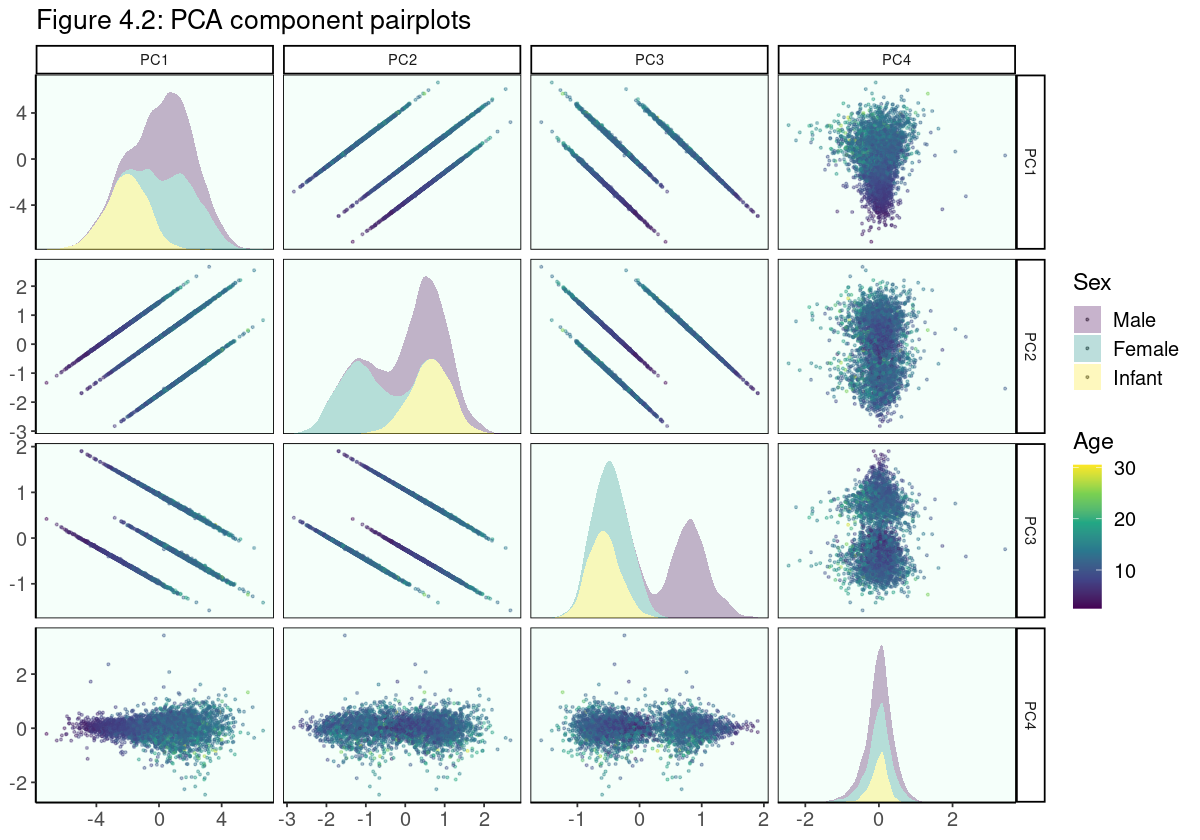

In [18]:
# update the number of components wish to plot
pca_mod$steps[[4]] <- update(pca_mod$steps[[4]], num_comp = 4)


options(repr.plot.width=10, repr.plot.height=7)
pca_mod %>% 
  prep() %>%
  bake(new_data = pca_data) %>%
  cbind(sex = pca_data$sex) %>%
  ggplot(aes(x = .panel_x, y = .panel_y, fill = sex, colour = age)) +
    geom_point(alpha = 0.4, size = 0.5) +
    geom_autodensity(alpha = .3, colour = NA) +
    facet_matrix(vars(-c(age, sex)), layer.diag = 2) +
    scale_color_viridis_c(name = "Age") +
    scale_fill_viridis_d(name = "Sex",
                         labels = c("Male", "Female", "Infant")) +
    theme_report() +
    theme(panel.background = element_rect(colour = "black", fill = "mintcream")) +
    ggtitle("Figure 4.2: PCA component pairplots")

The first plot confirms the observations from the previous analysis in that close to 90% of the variability in the data (88.9%) can be explained by just two principal components.

In [19]:
# this doesn't really say anything interesting/useful
# var_loadings %>%
#   filter(component %in% paste0("PC", 1:4)) %>%
#   mutate(component = fct_inorder(component)) %>%
#   ggplot(aes(value, terms, fill = terms)) +
#     geom_col(show.legend = FALSE) +
#     facet_wrap(~component, nrow = 1) +
#     labs(x = NULL,
#          y = NULL,
#          title = "Figure x.x: Variable loadings for each component") +
#     scale_fill_viridis_d() +
#     theme_report() +
#     theme(panel.background = element_rect(colour = "black", fill = "mintcream"))

# alternative way to visualise the above but again doesn't say anything useful
# var_loadings %>%
#   filter(component %in% paste0("PC", 1:5)) %>%
#   group_by(component) %>%
#   ungroup() %>%
#   mutate(terms = tidytext::reorder_within(terms, abs(value), component)) %>%
#   ggplot(aes(abs(value), terms, fill = value > 0)) +
#     geom_col() +
#     tidytext::scale_y_reordered() +
#     facet_wrap(~component, scales = "free_y") +
#     labs(y = NULL,
#          fill = "Positive?",
#          title = "Figure x.x: Variable loadings for each component") +
#     scale_fill_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
#     theme_report() +
#     theme(panel.background = element_rect(colour = "black", fill = "mintcream"))

### Outlier detection and removal

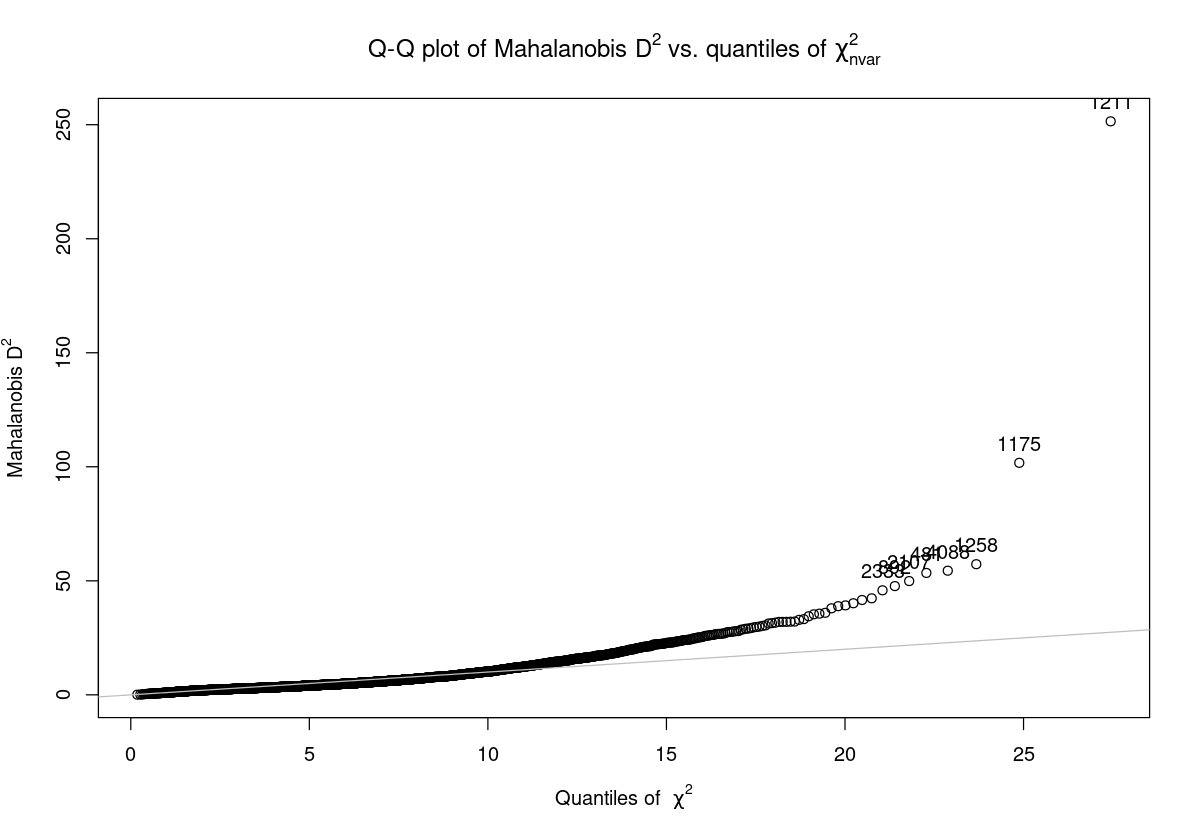

In [20]:
outlier_data <- abalone %>% select(-c(sex, ln_age))

options(repr.plot.width=10, repr.plot.height=7)
outlier_scores <- psych::outlier(outlier_data, bad = 8)

Based on this chart, there are two clear outliers and then it became less clear. The author decided to remove an additional six observations.

In [21]:
abalone_outliers <- data.frame(outlier_data, outlier_scores) %>% 
  mutate(sex = abalone$sex)

cutoff <- 45 # removes 7 observations
abalone_clean <- abalone_outliers %>%
  filter(outlier_scores <= cutoff) %>%
  select(-outlier_scores)

# options(repr.plot.width=15, repr.plot.height=10)
# psych::pairs.panels(abalone_outliers, bg = c("#004da6", "#00ddff")[(outlier_scores > 45)+1], pch=21)

## Modelling

### 1. Model development

#### 1.1 All variables

In [22]:
# model_data_v1 <- abalone_clean %>%
#   dplyr::select(age, sex, length, diameter, height, whole_wt)

# # split data into training and test sets
# set.seed(22)
# data_split <- initial_split(model_data_v1, prop = 0.8, strata = sex)

# train_data <- training(data_split)
# test_data <- testing(data_split)

# # five-fold cross-validation repeated twice
# set.seed(22)
# abalone_folds <- vfold_cv(train_data, strata = sex, v = 5, repeats = 2)

##### Recipes, model specifications and workflow sets

In [23]:
# # define the recipes
# basic_formula <- age ~ sex + length + diameter + height + whole_wt
# simple <- workflow_variables(outcomes = age, predictors = c(everything()))

# baseline_recipe <- recipe(basic_formula, data = train_data) %>% step_dummy(all_nominal())

# symmetric_recipe <- recipe(basic_formula, data = train_data) %>% 
#   bestNormalize::step_orderNorm(all_numeric_predictors()) %>%
#   step_dummy(all_nominal())

# interactions_recipe <- symmetric_recipe %>% step_interact(~ all_predictors():all_predictors())

# normalised_recipe <- symmetric_recipe %>% step_normalize(all_predictors())
# normalised_interactions_recipe <- interactions_recipe %>% step_normalize(all_predictors())

# pca_recipe <- normalised_recipe %>% step_pca(all_predictors(), num_comp = tune())
# pls_recipe <- normalised_recipe %>% step_pls(all_predictors(), outcome = "age", num_comp = tune())

In [24]:
# set up parallel processing - unfortunately this seems to like crashing the machine so not being used
# cores = parallel::detectCores(logical = FALSE)
# cl <- makePSOCKcluster(cores)
# registerDoParallel(cl)

In [25]:
# # train the models
# # use a racing approach instead of a grid search, which can be more efficient (and hence faster)
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# abalone_results_time <- 
#     system.time(
#         abalone_results <- 
#             all_wflows %>%
#             workflow_map("tune_race_anova", seed = 22, resamples = abalone_folds, grid = 5,
#                          control = race_ctrl, verbose = TRUE, metrics = metric_set(mae, mape, rsq, rmse))
#     )

# # save the results
# save(abalone_results, file = 'abalone_results_v1.rda')

✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (10s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.8s)

i 51 of 55 tuning:     PCA_nnet

✔ 51 of 55 tuning:     PCA_nnet (32.4s)

i 52 of 55 tuning:     PCA_brulee_nnet

✔ 52 of 55 tuning:     PCA_brulee_nnet (2m 9.1s)

i 53 of 55 tuning:     PCA_svm_radial



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (10s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.8s)

i 51 of 55 tuning:     PCA_nnet

✔ 51 of 55 tuning:     PCA_nnet (32.4s)

i 52 of 55 tuning:     PCA_brulee_nnet

✔ 52 of 55 tuning:     PCA_brulee_nnet (2m 9.1s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (10s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.8s)

i 51 of 55 tuning:     PCA_nnet

✔ 51 of 55 tuning:     PCA_nnet (32.4s)

i 52 of 55 tuning:     PCA_brulee_nnet



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (10s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.8s)

i 51 of 55 tuning:     PCA_nnet

✔ 51 of 55 tuning:     PCA_nnet (32.4s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (10s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.8s)

i 51 of 55 tuning:     PCA_nnet



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (10s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.8s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (10s)

i 50 of 55 tuning:     PCA_KNN



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (10s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)

i 49 of 55 tuning:     norm_svm_linear



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (19.7s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)

i 48 of 55 tuning:     norm_svm_poly



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (28.7s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)

i 47 of 55 tuning:     norm_svm_radial



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 6s)



In [26]:
# stopCluster(cl)

In [27]:
# # models requiring dummies and decorrelation (could be helped by symmetry)
# gam_spec <- gen_additive_mod(select_features = tune(), adjust_deg_free = tune()) %>% 
#   set_engine("mgcv") %>% 
#   set_mode("regression")

# # gam-specific wflow
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# gam_wflow <- workflow() %>%
#   add_recipe(baseline_recipe) %>%
#   add_model(gam_spec, formula = age ~ sex_I + sex_F + s(length) + s(diameter) + s(height) + s(whole_wt))

# gam_results <- gam_wflow %>% tune_race_anova(resamples = abalone_folds, grid = 5, control = race_ctrl,
#                                              metrics = metric_set(mae, mape, rsq, rmse))
# save(gam_results, file = 'gam_results_v1.rda')

# # models requiring dummies and decorrelation (could be helped by symmetry)
# gam_spec <- gen_additive_mod(select_features = TRUE, adjust_deg_free = tune()) %>% 
#   set_engine("mgcv") %>% 
#   set_mode("regression")

# # gam-specific wflow
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# gam_wflow <- workflow() %>%
#   add_recipe(baseline_recipe) %>%
#   add_model(gam_spec, formula = age ~ sex_I + sex_F + s(length) + s(diameter) + s(height) + s(whole_wt))

# fs_gam_results <- gam_wflow %>% tune_race_anova(resamples = abalone_folds, grid = 5, control = race_ctrl,
#                                                 metrics = metric_set(mae, mape, rsq, rmse))

# save(fs_gam_results, file = 'fs_gam_results_v1.rda')

In [28]:
# # # load results if necessary
# # load(file = 'gam_results_v1.rda')
# # load(file = 'fs_gam_results_v1.rda')

# best_gam_by_mae <- show_best(gam_results, metric = "mae", n = 1)
# best_gam_by_mape <- show_best(gam_results, metric = "mape", n = 1)
# best_gam_by_rsq <- show_best(gam_results, metric = "rsq", n = 1)

# best_fs_gam_by_mae <- show_best(fs_gam_results, metric = "mae", n = 1)
# best_fs_gam_by_mape <- show_best(fs_gam_results, metric = "mape", n = 1)
# best_fs_gam_by_rsq <- show_best(fs_gam_results, metric = "rsq", n = 1)

##### Model ranking and selection

In [29]:
# # load the results if necessary
# load(file = 'abalone_results_v1.rda')

# models_by_mae <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mae") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, best_gam_by_mae$mean, NA, NA, NA, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, best_fs_gam_by_mae$mean, NA, NA, NA, NA, NA, NA, NA)) %>%
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(mean_mae)
# models_by_mae$rank <- seq(1, nrow(models_by_mae), 1)

# models_by_mape <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mape") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, NA, best_gam_by_mape$mean, NA, NA, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, NA, best_fs_gam_by_mape$mean, NA, NA, NA, NA, NA, NA)) %>%
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(mean_mape)
# models_by_mape$rank <- seq(1, nrow(models_by_mape), 1)

# models_by_rsq <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mae") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, NA, NA, NA, best_gam_by_rsq$mean, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, NA, NA, NA, best_fs_gam_by_rsq$mean, NA, NA, NA, NA)) %>%        
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(desc(mean_rsq))
# models_by_rsq$rank <- seq(1, nrow(models_by_rsq), 1)

# # save the results
# save(models_by_mae, file = 'models_by_mae_v1.rda')
# save(models_by_mape, file = 'models_by_mape_v1.rda')
# save(models_by_rsq, file = 'models_by_rsq_v1.rda')

#### 1.2. Including an age-threshold indicator

In [30]:
# model_data_v2 <- abalone_clean %>%
#   dplyr::select(age, sex, length, diameter, height, whole_wt) %>%
#   mutate(age_thresh = ifelse(age < 13.5, 1, 0))

# # split data into training and test sets
# set.seed(22)
# data_split <- initial_split(model_data_v2, prop = 0.8, strata = sex)

# train_data <- training(data_split)
# test_data <- testing(data_split)

# # five-fold cross-validation repeated twice
# set.seed(22)
# abalone_folds <- vfold_cv(train_data, strata = sex, v = 5, repeats = 2)

##### Recipes, model specifications and workflow sets

In [31]:
# # define the recipes
# basic_formula <- age ~ sex + length + diameter + height + whole_wt + age_thresh
# simple <- workflow_variables(outcomes = age, predictors = c(everything()))

# baseline_recipe <- recipe(basic_formula, data = train_data) %>% step_dummy(all_nominal())

# symmetric_recipe <- recipe(basic_formula, data = train_data) %>% 
#   bestNormalize::step_orderNorm(all_numeric_predictors()) %>%
#   step_dummy(all_nominal())

# interactions_recipe <- symmetric_recipe %>% step_interact(~ all_predictors():all_predictors())

# normalised_recipe <- symmetric_recipe %>% step_normalize(all_predictors())
# normalised_interactions_recipe <- interactions_recipe %>% step_normalize(all_predictors())

# pca_recipe <- normalised_recipe %>% step_pca(all_predictors(), num_comp = tune())
# pls_recipe <- normalised_recipe %>% step_pls(all_predictors(), outcome = "age", num_comp = tune())

In [32]:
# # train the models
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# abalone_results_time <- 
#     system.time(
#         abalone_results <- 
#             all_wflows %>%
#             workflow_map("tune_race_anova", seed = 22, resamples = abalone_folds, grid = 5,
#                          control = race_ctrl, verbose = TRUE, metrics = metric_set(mae, mape, rsq, rmse))
#     )

# # save the results
# save(abalone_results, file = 'abalone_results_v2.rda')

In [33]:
# # models requiring dummies and decorrelation (could be helped by symmetry)
# gam_spec <- gen_additive_mod(select_features = tune(), adjust_deg_free = tune()) %>% 
#   set_engine("mgcv") %>% 
#   set_mode("regression")

# # gam-specific wflow
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# gam_wflow <- workflow() %>%
#   add_recipe(baseline_recipe) %>%
#   add_model(gam_spec, formula = age ~ sex_I + sex_F + age_thresh + s(length) + s(diameter) + s(height) + s(whole_wt))

# gam_results <- gam_wflow %>% tune_race_anova(resamples = abalone_folds, grid = 5, control = race_ctrl,
#                                              metrics = metric_set(mae, mape, rsq, rmse))
# save(gam_results, file = 'gam_results_v2.rda')

# # models requiring dummies and decorrelation (could be helped by symmetry)
# gam_spec <- gen_additive_mod(select_features = TRUE, adjust_deg_free = tune()) %>% 
#   set_engine("mgcv") %>% 
#   set_mode("regression")

# # gam-specific wflow
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# gam_wflow <- workflow() %>%
#   add_recipe(baseline_recipe) %>%
#   add_model(gam_spec, formula = age ~ sex_I + sex_F + age_thresh + s(length) + s(diameter) + s(height) + s(whole_wt))

# fs_gam_results <- gam_wflow %>% tune_race_anova(resamples = abalone_folds, grid = 5, control = race_ctrl,
#                                                 metrics = metric_set(mae, mape, rsq, rmse))
# save(fs_gam_results, file = 'fs_gam_results_v2.rda')

In [34]:
# # # load results if necessary
# load(file = 'gam_results_v2.rda')
# load(file = 'fs_gam_results_v2.rda')

# best_gam_by_mae <- show_best(gam_results, metric = "mae", n = 1)
# best_gam_by_mape <- show_best(gam_results, metric = "mape", n = 1)
# best_gam_by_rsq <- show_best(gam_results, metric = "rsq", n = 1)

# best_fs_gam_by_mae <- show_best(fs_gam_results, metric = "mae", n = 1)
# best_fs_gam_by_mape <- show_best(fs_gam_results, metric = "mape", n = 1)
# best_fs_gam_by_rsq <- show_best(fs_gam_results, metric = "rsq", n = 1)

##### Model ranking and selection

In [35]:
# # load the results if necessary
# load(file = 'abalone_results_v2.rda')

# models_by_mae <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mae") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, best_gam_by_mae$mean, NA, NA, NA, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, best_fs_gam_by_mae$mean, NA, NA, NA, NA, NA, NA, NA)) %>%
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(mean_mae)
# models_by_mae$rank <- seq(1, nrow(models_by_mae), 1)

# models_by_mape <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mape") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, NA, best_gam_by_mape$mean, NA, NA, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, NA, best_fs_gam_by_mape$mean, NA, NA, NA, NA, NA, NA)) %>%
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(mean_mape)
# models_by_mape$rank <- seq(1, nrow(models_by_mape), 1)

# models_by_rsq <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mae") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, NA, NA, NA, best_gam_by_rsq$mean, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, NA, NA, NA, best_fs_gam_by_rsq$mean, NA, NA, NA, NA)) %>%        
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(desc(mean_rsq))
# models_by_rsq$rank <- seq(1, nrow(models_by_rsq), 1)

# # save the results
# save(models_by_mae, file = 'models_by_mae_v2.rda')
# save(models_by_mape, file = 'models_by_mape_v2.rda')
# save(models_by_rsq, file = 'models_by_rsq_v2.rda')

#### 1.3. Log-transformed outcome variable

In [36]:
model_data_v3 <- abalone_clean %>%
  dplyr::select(age, sex, length, diameter, height, whole_wt) %>%
  mutate(age_thresh = ifelse(age < 13.5, 1, 0),
         ln_age = log(age)) %>%
  dplyr::select(-age)

# split data into training and test sets
set.seed(22)
data_split_v3 <- initial_split(model_data_v3, prop = 0.8, strata = sex)

train_data_v3 <- training(data_split_v3)
test_data_v3 <- testing(data_split_v3)

# five-fold cross-validation repeated twice
set.seed(22)
abalone_folds_v3 <- vfold_cv(train_data_v3, strata = sex, v = 5, repeats = 2)

##### Recipes, model specifications and workflow sets

In [37]:
# # define the recipes
# basic_formula <- ln_age ~ sex + length + diameter + height + whole_wt + age_thresh
# simple <- workflow_variables(outcomes = ln_age, predictors = c(everything()))

# baseline_recipe <- recipe(basic_formula, data = train_data) %>% step_dummy(all_nominal())

# symmetric_recipe <- recipe(basic_formula, data = train_data) %>% 
#   bestNormalize::step_orderNorm(all_numeric_predictors()) %>%
#   step_dummy(all_nominal())

# interactions_recipe <- symmetric_recipe %>% step_interact(~ all_predictors():all_predictors())

# normalised_recipe <- symmetric_recipe %>% step_normalize(all_predictors())
# normalised_interactions_recipe <- interactions_recipe %>% step_normalize(all_predictors())

# pca_recipe <- normalised_recipe %>% step_pca(all_predictors(), num_comp = tune())
# pls_recipe <- normalised_recipe %>% step_pls(all_predictors(), outcome = "ln_age", num_comp = tune())

In [38]:
# # define the model specifications
# # linear/linear-based models
# linear_spec <- linear_reg() %>% set_engine("lm")
# lasso_spec <- linear_reg(penalty = tune(), mixture = 1) %>% set_engine("glmnet")
# ridge_spec <- linear_reg(penalty = tune(), mixture = 0) %>% set_engine("glmnet")
# glmn_spec <- linear_reg(penalty = tune(), mixture = tune()) %>% set_engine("glmnet")

# # models requiring no pre-processing
# cubist_spec <- cubist_rules(committees = tune(), neighbors = tune()) %>% 
#   set_engine("Cubist")

# # models requiring no pre-processing (could be helped by decorrelation)
# bag_cart_spec <- bag_tree(tree_depth = tune()) %>% 
#   set_engine("rpart", times = 50L) %>% 
#   set_mode("regression")

# cart_spec <- decision_tree(cost_complexity = tune(), tree_depth = tune(), min_n = tune()) %>% 
#   set_engine("rpart") %>% 
#   set_mode("regression")

# lightgb_spec <- boost_tree(tree_depth = tune(), learn_rate = tune(), loss_reduction = tune(), 
#                            min_n = tune(), sample_size = tune(), trees = tune()) %>% 
#   set_engine("lightgbm") %>% 
#   set_mode("regression")

# rf_spec <- rand_forest(mtry = tune(), trees = tune(), min_n = tune()) %>% 
#   set_engine("ranger") %>% 
#   set_mode("regression")

# # models requiring only dummy creation (could be helped by decorrelation)
# xgb_spec <- boost_tree(mtry = tune(), trees = tune(), min_n = tune(), tree_depth = tune(),
#                        learn_rate = tune(), sample_size = tune()) %>% 
#   set_engine("xgboost") %>% 
#   set_mode("regression")

# # models requiring only dummy creation (could be helped by symmetry and decorrelation)
# bag_mars_spec <- bag_mars(num_terms = tune(), prod_degree = tune()) %>%
#   set_engine("earth") %>%
#   set_mode("regression")

# mars_spec <- mars(num_terms = tune(), prod_degree = tune()) %>%
#   set_engine("earth") %>% 
#   set_mode("regression")

# # models requiring dummies, normalisation and symmetry (could be helped by decorrelation)
# knn_spec <- nearest_neighbor(neighbors = tune(), dist_power = tune(), weight_func = tune()) %>% 
#   set_engine("kknn") %>% 
#   set_mode("regression")

# # models requiring dummies, normalisation, symmetry and decorrelation
# nnet_spec <- mlp(hidden_units = tune(), penalty = tune(), epochs = tune()) %>% 
#   set_engine("nnet", MaxNWts = 2600) %>% 
#   set_mode("regression")

# brulee_nnet_spec <- mlp(hidden_units = tune(), epochs = tune(), dropout = tune(),
#                         learn_rate = tune(), activation = tune()) %>% 
#   set_engine("brulee", MaxNWts = 2600) %>% 
#   set_mode("regression")

# keras_nnet_spec <- mlp(hidden_units = tune(), epochs = tune(), dropout = tune()) %>% 
#   set_engine("keras", MaxNWts = 2600) %>% 
#   set_mode("regression")

# svm_l_spec <- svm_linear(cost = tune(), margin = tune()) %>% 
#   set_engine("LiblineaR") %>% 
#   set_mode("regression")

# svm_p_spec <- svm_poly(cost = tune(), degree = tune(), scale_factor = tune(), margin = tune()) %>% 
#   set_engine("kernlab") %>% 
#   set_mode("regression")

# svm_r_spec <- svm_rbf(cost = tune(), rbf_sigma = tune(), margin = tune()) %>% 
#   set_engine("kernlab") %>% 
#   set_mode("regression")

In [39]:
# # define the model workflows...
# linear_wflow <- workflow_set(
#   preproc = list(min = baseline_recipe,
#                  sym = symmetric_recipe,
#                  inter = interactions_recipe,
#                  norm = normalised_recipe,
#                  norminter = normalised_interactions_recipe),
#   models = list(linear_reg = linear_spec,
#                 lasso_reg = lasso_spec,
#                 ridge_reg = ridge_spec,
#                 glmnet = glmn_spec)
#   )

# linear_dr_wflow <- workflow_set(
#   preproc = list(PCA = pca_recipe,
#                  PLS = pls_recipe),
#   models = list(linear_reg = linear_spec)
#   )

# no_preproc_wflow <- workflow_set(
#   preproc = list(simple = simple),
#   models = list(cubist = cubist_spec,
#                 rf = rf_spec)
#   )

# no_preproc2_wflow <- workflow_set(
#   preproc = list(simple = simple,
#                  PCA = pca_recipe,
#                  PLS = pls_recipe),
#   models = list(CART = cart_spec,
#                 CART_bagged = bag_cart_spec,
#                 lgb = lightgb_spec)
#   )

# dummy_wflow <- workflow_set(
#   preproc = list(min = baseline_recipe,
#                  sym = symmetric_recipe,
#                  PCA = pca_recipe,
#                  PLS = pls_recipe),
#   models = list(MARS = mars_spec,
#                 MARS_bagged = bag_mars_spec)
#   )

# xgb_wflow <- workflow_set(
#   preproc = list(min = baseline_recipe,
#                  sym = symmetric_recipe),
#   models = list(xgb = xgb_spec)
#   )

# norm_wflow <- workflow_set(
#   preproc = list(norm = normalised_recipe,
#                  PCA = pls_recipe,
#                  PLS = pls_recipe),
#   models = list(KNN = knn_spec,
#                 nnet = nnet_spec,
#                 brulee_nnet = brulee_nnet_spec,
#                 #keras_nnet = keras_nnet_spec,
#                 svm_radial = svm_r_spec,
#                 svm_poly = svm_p_spec,
#                 svm_linear = svm_l_spec)
#   )

# # combine them into one mega-workflow
# all_wflows <- bind_rows(linear_wflow, linear_dr_wflow, no_preproc_wflow, no_preproc2_wflow, dummy_wflow, xgb_wflow, norm_wflow)

In [40]:
# # train the models
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# abalone_results_time <- 
#     system.time(
#         abalone_results <- 
#             all_wflows %>%
#             workflow_map("tune_race_anova", seed = 22, resamples = abalone_folds, grid = 5,
#                          control = race_ctrl, verbose = TRUE, metrics = metric_set(mae, mape, rsq, rmse))
#     )

# # save the results
# save(abalone_results, file = 'abalone_results_v3.rda')

✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (16.4s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.7s)

i 51 of 55 tuning:     PCA_nnet

✔ 51 of 55 tuning:     PCA_nnet (33.5s)

i 52 of 55 tuning:     PCA_brulee_nnet

✔ 52 of 55 tuning:     PCA_brulee_nnet (2m 27.6s)

i 53 of 55 tuning:     PCA_svm_radial



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (16.4s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.7s)

i 51 of 55 tuning:     PCA_nnet

✔ 51 of 55 tuning:     PCA_nnet (33.5s)

i 52 of 55 tuning:     PCA_brulee_nnet

✔ 52 of 55 tuning:     PCA_brulee_nnet (2m 27.6s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (16.4s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.7s)

i 51 of 55 tuning:     PCA_nnet

✔ 51 of 55 tuning:     PCA_nnet (33.5s)

i 52 of 55 tuning:     PCA_brulee_nnet



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (16.4s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.7s)

i 51 of 55 tuning:     PCA_nnet

✔ 51 of 55 tuning:     PCA_nnet (33.5s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (16.4s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.7s)

i 51 of 55 tuning:     PCA_nnet



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (16.4s)

i 50 of 55 tuning:     PCA_KNN

✔ 50 of 55 tuning:     PCA_KNN (23.7s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (16.4s)

i 50 of 55 tuning:     PCA_KNN



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear

✔ 49 of 55 tuning:     norm_svm_linear (16.4s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)

i 49 of 55 tuning:     norm_svm_linear



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly

✔ 48 of 55 tuning:     norm_svm_poly (20.8s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)

i 48 of 55 tuning:     norm_svm_poly



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial

✔ 47 of 55 tuning:     norm_svm_radial (23.5s)



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)

i 47 of 55 tuning:     norm_svm_radial



✔ 46 of 55 tuning:     norm_brulee_nnet (2m 31s)



In [41]:
# # models requiring dummies and decorrelation (could be helped by symmetry)
# gam_spec <- gen_additive_mod(select_features = tune(), adjust_deg_free = tune()) %>% 
#   set_engine("mgcv") %>% 
#   set_mode("regression")

# # gam-specific wflow
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# gam_wflow <- workflow() %>%
#   add_recipe(baseline_recipe) %>%
#   add_model(gam_spec, formula = ln_age ~ sex_I + sex_F + age_thresh + s(length) + s(diameter) + s(height) + s(whole_wt))

# gam_results <- gam_wflow %>% tune_race_anova(resamples = abalone_folds, grid = 5, control = race_ctrl,
#                                              metrics = metric_set(mae, mape, rsq, rmse))
# save(gam_results, file = 'gam_results_v3.rda')

# # models requiring dummies and decorrelation (could be helped by symmetry)
# gam_spec <- gen_additive_mod(select_features = TRUE, adjust_deg_free = tune()) %>% 
#   set_engine("mgcv") %>% 
#   set_mode("regression")

# # gam-specific wflow
# race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

# gam_wflow <- workflow() %>%
#   add_recipe(baseline_recipe) %>%
#   add_model(gam_spec, formula = ln_age ~ sex_I + sex_F + age_thresh + s(length) + s(diameter) + s(height) + s(whole_wt))

# fs_gam_results <- gam_wflow %>% tune_race_anova(resamples = abalone_folds, grid = 5, control = race_ctrl,
#                                                 metrics = metric_set(mae, mape, rsq, rmse))

# save(fs_gam_results, file = 'fs_gam_results_v3.rda')

In [42]:
# # load results if necessary
# load(file = 'gam_results_v3.rda')
# load(file = 'fs_gam_results_v3.rda')

# best_gam_by_mae <- show_best(gam_results, metric = "mae", n = 1)
# best_gam_by_mape <- show_best(gam_results, metric = "mape", n = 1)
# best_gam_by_rsq <- show_best(gam_results, metric = "rsq", n = 1)

# best_fs_gam_by_mae <- show_best(fs_gam_results, metric = "mae", n = 1)
# best_fs_gam_by_mape <- show_best(fs_gam_results, metric = "mape", n = 1)
# best_fs_gam_by_rsq <- show_best(fs_gam_results, metric = "rsq", n = 1)

##### Model ranking and selection

In [43]:
# # load the results if necessary
# load(file = 'abalone_results_v3.rda')

# models_by_mae <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mae") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, best_gam_by_mae$mean, NA, NA, NA, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, best_fs_gam_by_mae$mean, NA, NA, NA, NA, NA, NA, NA)) %>%
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(mean_mae)
# models_by_mae$rank <- seq(1, nrow(models_by_mae), 1)

# models_by_mape <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mape") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, NA, best_gam_by_mape$mean, NA, NA, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, NA, best_fs_gam_by_mape$mean, NA, NA, NA, NA, NA, NA)) %>%
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(mean_mape)
# models_by_mape$rank <- seq(1, nrow(models_by_mape), 1)

# models_by_rsq <- abalone_results %>%
#   rank_results(select_best = TRUE, rank_metric = "mae") %>%
#   dplyr::select(model, wflow_id, .metric, mean, std_err, rank) %>%
#   pivot_wider(names_from = .metric, values_from = mean:std_err) %>%
#   separate(wflow_id, into = stringr::str_c("split", 1:3), sep = "_", remove = FALSE, fill = "right") %>%
#   mutate(model_v2 = ifelse(is.na(split3), split2, stringr::str_c(split2, "_", split3))) %>%
#   dplyr::select(wflow_id, model, model_v2, preproc = split1, rank:std_err_rsq) %>%
#   rbind(c(NA, "gen_additive_mod", "gam", "min", 1, NA, NA, NA, best_gam_by_rsq$mean, NA, NA, NA, NA),
#         c(NA, "gen_additive_mod", "gam_fs", "min", 1, NA, NA, NA, best_fs_gam_by_rsq$mean, NA, NA, NA, NA)) %>%        
#   mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
#   arrange(desc(mean_rsq))
# models_by_rsq$rank <- seq(1, nrow(models_by_rsq), 1)

# # save the results
# save(models_by_mae, file = 'models_by_mae_v3.rda')
# save(models_by_mape, file = 'models_by_mape_v3.rda')
# save(models_by_rsq, file = 'models_by_rsq_v3.rda')

#### 1.4 Reduced GAM

In [44]:
model_data_v4 <- abalone_clean %>%
  dplyr::select(age, diameter, height) %>%
  mutate(age_thresh = ifelse(age < 13.5, 1, 0),
         ln_age = log(age)) %>%
  dplyr::select(-age)

# split data into training and test sets
set.seed(22)
data_split <- initial_split(model_data_v4, prop = 0.8)

train_data <- training(data_split)
test_data <- testing(data_split)

# five-fold cross-validation repeated twice
set.seed(22)
abalone_folds <- vfold_cv(train_data, v = 5, repeats = 2)

In [45]:
basic_formula <- ln_age ~ diameter + height + age_thresh
baseline_recipe <- recipe(basic_formula, data = train_data) %>% step_dummy(all_nominal())

# models requiring dummies and decorrelation (could be helped by symmetry)
gam_spec <- gen_additive_mod(select_features = FALSE, adjust_deg_free = tune()) %>% 
  set_engine("mgcv") %>% 
  set_mode("regression")

# gam-specific wflow
race_ctrl = control_race(save_pred = TRUE, parallel_over = "everything", save_workflow = TRUE)

gam_wflow <- workflow() %>%
  add_recipe(baseline_recipe) %>%
  add_model(gam_spec, formula = ln_age ~ age_thresh + s(diameter) + s(height))
r_gam_results <- gam_wflow %>% tune_race_anova(resamples = abalone_folds, grid = 5, control = race_ctrl,
                                             metrics = metric_set(mae, mape, rsq, rmse))
save(r_gam_results, file = 'gam_results_v4.rda')

In [46]:
# load results if necessary
load(file = 'gam_results_v4.rda')

best_gam_by_mae <- show_best(r_gam_results, metric = "mae", n = 1)
best_gam_by_mape <- show_best(r_gam_results, metric = "mape", n = 1)
best_gam_by_rsq <- show_best(r_gam_results, metric = "rsq", n = 1)

### 2. Model evaluation

In [47]:
# load all the model results
# need to re-mutate as they get converted back to character variables
load(file = 'models_by_mae_v1.rda')
models_by_mae_v1 <- models_by_mae %>% mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric))
load(file = 'models_by_mape_v1.rda')
models_by_mape_v1 <- models_by_mape %>% mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric))
load(file = 'models_by_rsq_v1.rda')
models_by_rsq_v1 <- models_by_rsq %>% mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric))

load(file = 'models_by_mae_v2.rda')
models_by_mae_v2 <- models_by_mae %>% mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric))
load(file = 'models_by_mape_v2.rda')
models_by_mape_v2 <- models_by_mape %>% mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric))
load(file = 'models_by_rsq_v2.rda')
models_by_rsq_v2 <- models_by_rsq %>% mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric))

load(file = 'models_by_mae_v3.rda')
models_by_mae_v3 <- models_by_mae %>% 
  mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
  rbind(c(NA, "gen_additive_mod", "gam_r", "min", 1, best_gam_by_mae$mean, best_gam_by_mape$mean, NA, best_gam_by_rsq$mean, NA, NA, NA, NA)) %>%
  arrange(mean_mae)
models_by_mae_v3$rank <- seq(1, nrow(models_by_mae_v3), 1)
load(file = 'models_by_mape_v3.rda')
models_by_mape_v3 <- models_by_mape %>%
  mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
  rbind(c(NA, "gen_additive_mod", "gam_r", "min", 1, best_gam_by_mae$mean, best_gam_by_mape$mean, NA, best_gam_by_rsq$mean, NA, NA, NA, NA)) %>%
  arrange(mean_mape)
models_by_mape_v3$rank <- seq(1, nrow(models_by_mape_v3), 1)
load(file = 'models_by_rsq_v3.rda')
models_by_rsq_v3 <- models_by_rsq %>%
  mutate(across(starts_with("mean") | starts_with("std_err"), as.numeric)) %>%
  rbind(c(NA, "gen_additive_mod", "gam_r", "min", 1, best_gam_by_mae$mean, best_gam_by_mape$mean, NA, best_gam_by_rsq$mean, NA, NA, NA, NA)) %>%
  arrange(desc(mean_rsq))
models_by_rsq_v3$rank <- seq(1, nrow(models_by_rsq_v3), 1)

# concatenate dataframes together
source_list <- list("mae_v1", "mape_v1", "rsq_v1", "mae_v2", "mape_v2", "rsq_v2")
source_list2 <- list("mae_v3", "mape_v3", "rsq_v3")
v1_v2_results <- bind_rows(models_by_mae_v1, models_by_mape_v1, models_by_rsq_v1,
                           models_by_mae_v2, models_by_mape_v2, models_by_rsq_v2) %>%
         # identify source
  mutate(source = as.character(rep(source_list, each = 57)),
         # convert mean_ and std_err_ columns to numeric instead of character
         across(starts_with("mean") | starts_with("std_err"), as.numeric))  

v3_results <- bind_rows(models_by_mae_v3, models_by_mape_v3, models_by_rsq_v3) %>%
         # identify source
  mutate(source = as.character(rep(source_list2, each = 58)),
         # convert mean_ and std_err_ columns to numeric instead of character
         across(starts_with("mean") | starts_with("std_err"), as.numeric))  

all_results <- bind_rows(v1_v2_results, v3_results)

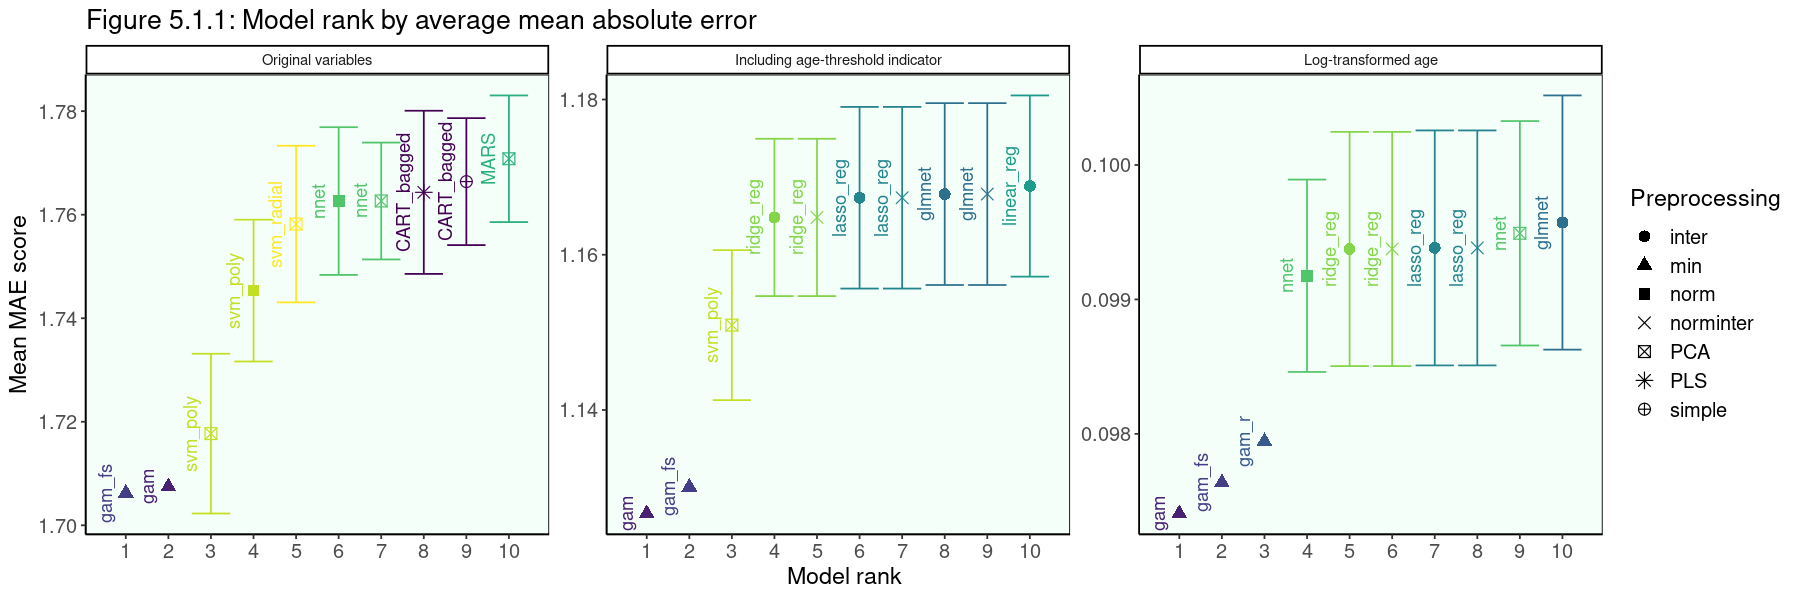

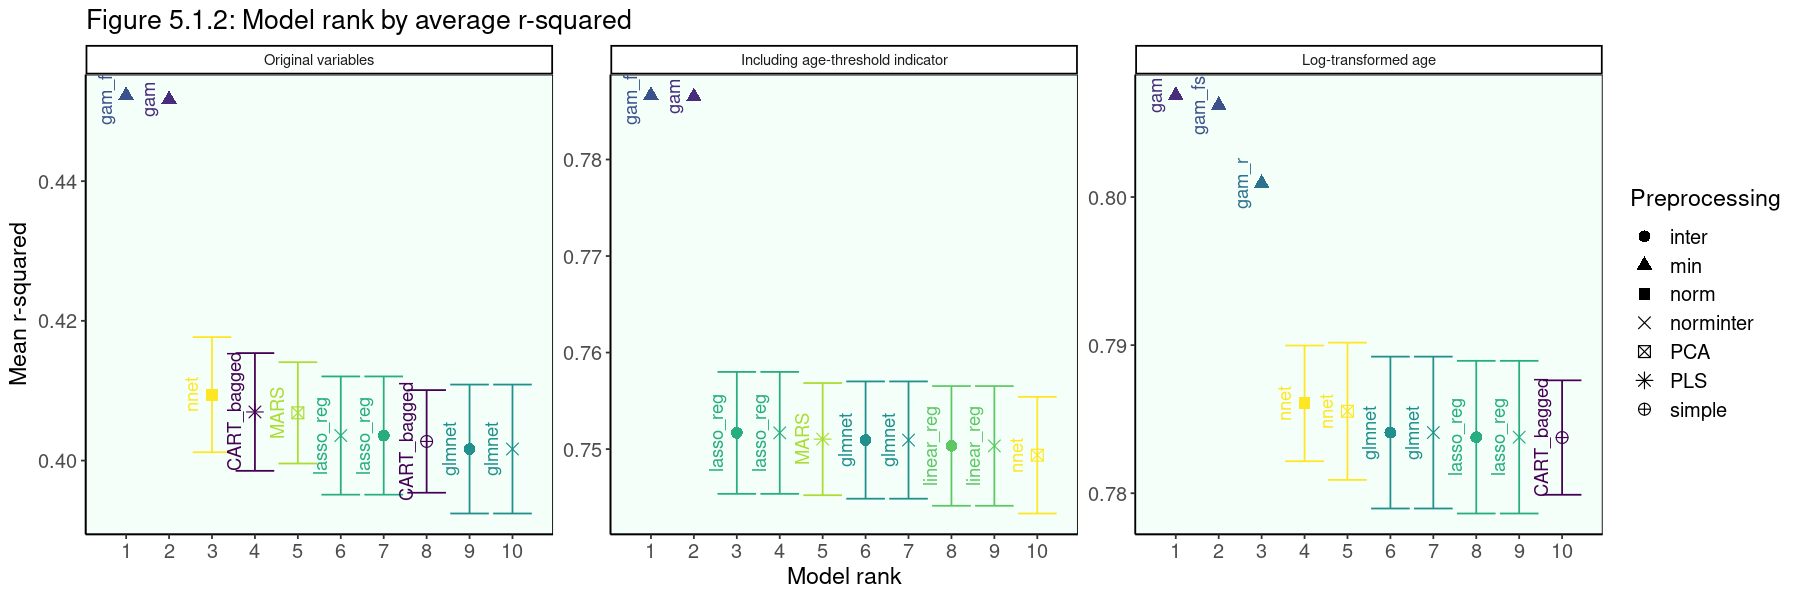

In [48]:
# plot the mae results, faceted by source
options(repr.plot.width=15, repr.plot.height=5)
all_results %>%
  group_by(source) %>%
  filter(rank <= 10 & str_detect(source, "^mae")) %>%
  ggplot(aes(x = rank, y = mean_mae, colour = model_v2, shape = preproc)) +
    geom_point(size = 3) +
    geom_errorbar(aes(ymin = mean_mae - std_err_mae, ymax = mean_mae + std_err_mae)) +
    facet_wrap(vars(source), scales = "free_y",
               labeller = labeller(source = c(mae_v1 = "Original variables",
                                              mae_v2 = "Including age-threshold indicator",
                                              mae_v3 = "Log-transformed age"))) +
    geom_text(aes(y = mean_mae, label = model_v2), angle = 90, vjust = -1) +
    labs(x = "Model rank",
         y = "Mean MAE score",
         title = "Figure 5.1.1: Model rank by average mean absolute error",
         shape = "Preprocessing") +
    scale_x_continuous(breaks = seq(1,10,1)) +
    scale_colour_viridis_d() +
    scale_shape_manual(values = c(16, 17, 15, 4, 7, 8, 10)) +
    guides(colour = "none") +
    theme_report() +
    theme(panel.background = element_rect(colour = "black", fill = "mintcream"))

# plot the rsq results, faceted by source
options(repr.plot.width=15, repr.plot.height=5)
all_results %>%
  group_by(source) %>%
  filter(rank <= 10 & str_detect(source, "^rsq")) %>%
  ggplot(aes(x = rank, y = mean_rsq, colour = model_v2, shape = preproc)) +
    geom_point(size = 3) +
    geom_errorbar(aes(ymin = mean_rsq - std_err_rsq, ymax = mean_rsq + std_err_rsq)) +
    facet_wrap(vars(source), scales = "free_y",
               labeller = labeller(source = c(rsq_v1 = "Original variables",
                                              rsq_v2 = "Including age-threshold indicator",
                                              rsq_v3 = "Log-transformed age"))) +
    geom_text(aes(y = mean_rsq, label = model_v2), angle = 90, vjust = -1) +
    labs(x = "Model rank",
         y = "Mean r-squared",
         title = "Figure 5.1.2: Model rank by average r-squared",
         shape = "Preprocessing") +
    scale_x_continuous(breaks = seq(1,10,1)) +
    scale_colour_viridis_d() +
    scale_shape_manual(values = c(16, 17, 15, 4, 7, 8, 10)) +
    guides(colour = "none") +
    theme_report() +
    theme(panel.background = element_rect(colour = "black", fill = "mintcream"))

In [49]:
print("Table 5.1: Top-five model average MAE and MAPE performance on the training data")
table51 <- all_results %>%
  filter(((source == "mae_v1" | source == "mae_v2") & rank <= 3) | (source == "mae_v3" & rank <= 5)) %>%
  select(model = model_v2, preproc, rank, mean_mae, mean_mape, std_err_mae, std_err_mape, iteration = source) %>%
  mutate(mean_mape = (all_results %>% filter(((source == "mae_v1" | source == "mae_v2") & rank <= 3) | (source == "mae_v3" & rank <= 5)))$mean_mape)

table51$mean_mape[table51$iteration == "mae_v1" & table51$model == "gam_fs"] <- 
  all_results %>% filter(source == "mape_v1" & model == "gen_additive_mod" & model_v2 == "gam_fs") %>% dplyr::select(mean_mape)
table51$mean_mape[table51$iteration == "mae_v1" & table51$model == "gam"] <- 
  all_results %>% filter(source == "mape_v1" & model == "gen_additive_mod" & model_v2 == "gam") %>% dplyr::select(mean_mape)

table51$mean_mape[table51$iteration == "mae_v2" & table51$model == "gam_fs"] <- 
  all_results %>% filter(source == "mape_v2" & model == "gen_additive_mod" & model_v2 == "gam_fs") %>% dplyr::select(mean_mape)
table51$mean_mape[table51$iteration == "mae_v2" & table51$model == "gam"] <- 
  all_results %>% filter(source == "mape_v2" & model == "gen_additive_mod" & model_v2 == "gam") %>% dplyr::select(mean_mape)

table51$mean_mape[table51$iteration == "mae_v3" & table51$model == "gam_fs"] <- 
  all_results %>% filter(source == "mape_v3" & model == "gen_additive_mod" & model_v2 == "gam_fs") %>% dplyr::select(mean_mape)
table51$mean_mape[table51$iteration == "mae_v3" & table51$model == "gam"] <- 
  all_results %>% filter(source == "mape_v3" & model == "gen_additive_mod" & model_v2 == "gam") %>% dplyr::select(mean_mape)

table51$mean_mape <- as.numeric(table51$mean_mape)
table51 <- table51 %>% mutate(mean_mae = round(mean_mae, 4), mean_mape = round(mean_mape, 4),
                              std_err_mae = round(std_err_mae, 4), std_err_mape = round(std_err_mape, 4))
table51

print("Table 5.2: Top-five model average r-squared performance on the training data")
table52 <- all_results %>%
  filter(((source == "rsq_v1" | source == "rsq_v2") & rank <= 3) | (source == "rsq_v3" & rank <= 5)) %>%
  mutate(mean_rsq = round(mean_rsq, 4),
         std_err_rsq = round(std_err_rsq, 4)) %>%
  select(model = model_v2, preproc, rank, mean_rsq, std_err_rsq, iteration = source)
table52

[1] "Table 5.1: Top-five model average MAE and MAPE performance on the training data"


model     preproc rank mean_mae mean_mape std_err_mae std_err_mape iteration
1  gam_fs    min     1    1.7062   14.3756       NA          NA       mae_v1   
2  gam       min     2    1.7075   14.4115       NA          NA       mae_v1   
3  svm_poly  PCA     3    1.7177   13.8197   0.0154      0.1193       mae_v1   
4  gam       min     1    1.1267    9.6725       NA          NA       mae_v2   
5  gam_fs    min     2    1.1301    9.6733       NA          NA       mae_v2   
6  svm_poly  PCA     3    1.1509    9.8465   0.0097      0.0793       mae_v2   
7  gam       min     1    0.0974    4.0896       NA          NA       mae_v3   
8  gam_fs    min     2    0.0976    4.1056       NA          NA       mae_v3   
9  gam_r     min     3    0.0979    4.1721       NA          NA       mae_v3   
10 nnet      norm    4    0.0992    4.1950   0.0007      0.0309       mae_v3   
11 ridge_reg inter   5    0.0994    4.2040   0.0009      0.0390       mae_v3

[1] "Table 5.2: Top-five model average r-squared performance on the training data"


model     preproc rank mean_rsq std_err_rsq iteration
1  gam_fs    min     1    0.4523       NA      rsq_v1   
2  gam       min     2    0.4517       NA      rsq_v1   
3  nnet      norm    3    0.4094   0.0082      rsq_v1   
4  gam_fs    min     1    0.7866       NA      rsq_v2   
5  gam       min     2    0.7865       NA      rsq_v2   
6  lasso_reg inter   3    0.7517   0.0063      rsq_v2   
7  gam       min     1    0.8069       NA      rsq_v3   
8  gam_fs    min     2    0.8062       NA      rsq_v3   
9  gam_r     min     3    0.8009       NA      rsq_v3   
10 nnet      norm    4    0.7861   0.0039      rsq_v3   
11 nnet      PCA     5    0.7855   0.0046      rsq_v3

These two plots indicate that overall, no algorithm came close to outperforming the generalised additive model (GAM) on the training data. Furthermore, forcing feature selection on the model had a largely marginal impact on model performance relatively speaking. The next-best model was generally either a polynomial support vector machine or a simple feed-forward neural network except for the second variation in which the second-best r-squared value was produced by a LASSO (least absolute shrinkage and selection operator) regression model.

The tables presents the performance metric values for the top three models on the training data. Note that mean absolute error refers to the average distance that the predictions were away from the true value of the outcome variable. For example, the third-iteration GAM model's predictions were on average higher/lower than the actual value by 0.097 log-years (or 1.1 years when reversing the transformation). In percentage terms, this was an error of about 4.1%. Similarly, the best performing GAM had an r-squared of 80.7%, which meant that 80.7% of the variability in the natural logarithm of age could be explained by the physical characteristics of the abalone (the input features).

The final point to note is that GAM_r refers to a model variant in which only the age-threshold, diameter and height were used to model the natural logarithm of age after consideration of the model diagnostics of GAM_fs. It appears that dropping many of the input variables had only a relatively minor impact on model performance, with the MAE increasing to 0.098 (equivalent to a MAPE of 4.2%) and the model r-squared remaining above 80% on the training data (80.1%).

From the author's perspective, this is a great result as GAMs are a class of models that enable linear regression models to handle non-linear relationships whilst maintaining model interpretability. For those more technically-minded, this is because GAMs relax the assumption that the relationship between an outcome and the explanatory variables is a simple weighted sum by assuming that it can be modelled by a sum of arbitrary functions of each input feature.

In [50]:
# examine the hyperparameters
options(repr.plot.width=10, repr.plot.height=7)
load(file = 'gam_results_v3.rda')
hp_tuning_plot <- gam_results %>% 
  show_best(metric = "mae", n = 50) %>%
  ggplot(aes(x = adjust_deg_free, y = mean, colour = select_features)) +
    geom_point(size = 3) +
    scale_colour_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
    labs(x = "Adjust_deg_free",
         y = "MAE",
         title = "Figure x.x: GAM hyperparameter tuning results") +
    theme_report()

load(file = 'fs_gam_results_v3.rda')
fs_hp_tuning_plot <- fs_gam_results %>% 
  show_best(metric = "mae", n = 50) %>%
  ggplot(aes(x = adjust_deg_free, y = mean)) +
    geom_point(size = 3) +
    scale_colour_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
    labs(x = "Adjust_deg_free",
         y = "MAE",
         title = "Figure x.x: GAM hyperparameter tuning results") +
    theme_report()

load(file = 'gam_results_v4.rda')
r_hp_tuning_plot <- r_gam_results %>% 
  show_best(metric = "mae", n = 50) %>%
  ggplot(aes(x = adjust_deg_free, y = mean)) +
    geom_point(size = 3) +
    scale_colour_manual(values = c("#004da6", "#00a6a6", "#00ddff")) +
    labs(x = "Adjust_deg_free",
         y = "MAE",
         title = "Figure x.x: GAM hyperparameter tuning results") +
    theme_report()

In [51]:
# extract the best models based on MAE
# note that if we choose based on rsq, the first is the same but the best feature-selection model is Preprocessor1_Model3 and the best R-squared model is Preprocessor1_Model4
best_gam <- gam_results %>% select_best(metric = "mae") # Preprocessor1_Model2
best_fs_gam <- fs_gam_results %>% select_best(metric = "mae") # Preprocessor1_Model5
best_r_gam <- r_gam_results %>% select_best(metric = "mae") # Preprocessor1_Model1

# finalise them on the test data i.e. these are the fitted workflows
final_fs_gam <- fs_gam_results %>% 
  extract_workflow() %>% 
  finalize_workflow(best_fs_gam) %>% 
  last_fit(split = data_split_v3, metrics = metric_set(mae, mape, rsq, rmse))

final_r_gam <- r_gam_results %>% 
  extract_workflow() %>% 
  finalize_workflow(best_r_gam) %>% 
  last_fit(split = data_split, metrics = metric_set(mae, mape, rsq, rmse))

# evaluate performance on the test set
# collect_metrics(final_gam)
print("Table 5.3: Performance metrics of the final GAM on the test data")
collect_metrics(final_fs_gam) %>% 
  dplyr::select(-c(.estimator, .config)) %>% 
  mutate(.estimate = round(.estimate, 4))

[1] "Table 5.3: Performance metrics of the final GAM on the test data"


.metric .estimate
1 mae     0.1019   
2 mape    4.2738   
3 rsq     0.7671   
4 rmse    0.1290

Recall from the previous section that the best performing model incorporating feature selection had a MAE of 0.097, MAPE of 4.1% and r-squared value of 80.6%. On the test data, these increased slightly to the figures in the table above, but the increase was not large. This is a good sign as it indicated that the model was not overfitting on the training data.

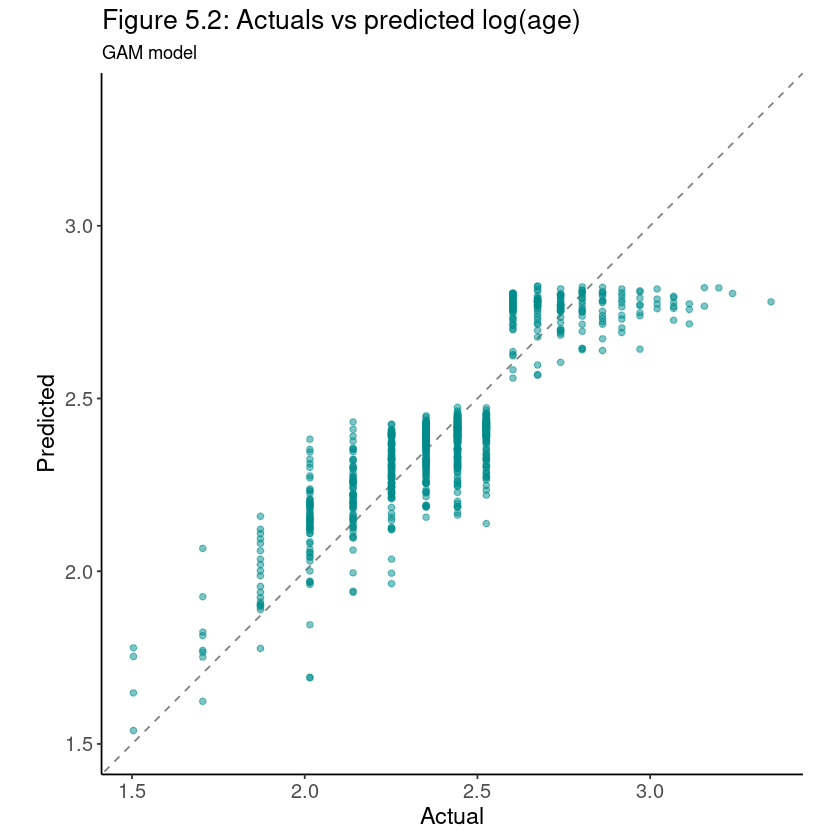

In [52]:
# assess predicted vs actuals
options(repr.plot.width=7, repr.plot.height=7)
collect_predictions(final_fs_gam) %>%
  ggplot(aes(x = ln_age, y = .pred)) + 
  geom_abline(color = "gray50", lty = 2) + 
  geom_point(colour = "dark cyan", alpha = 0.5) + 
  coord_obs_pred() + 
  labs(x = "Actual",
       y = "Predicted",
       title = "Figure 5.2: Actuals vs predicted log(age)",
       subtitle = "GAM model") +
  theme_report()

The plot above shows the predicted values against the residuals. It indicates that the model fit was reasonably good, but there are still some odd things occurring. In addition, note that the break at 2.5 is due to the inclusion of the age-threshold indicator as an explanatory variable.

#### Variable importance

In [53]:
best_fs_wflow_fit <- extract_workflow(final_fs_gam)

set.seed(22)
fs_gam_explainer <- explain_tidymodels(
    best_fs_wflow_fit,
    data = train_data_v3 %>% dplyr::select(-ln_age),
    y = train_data_v3$ln_age,
    verbose = FALSE)

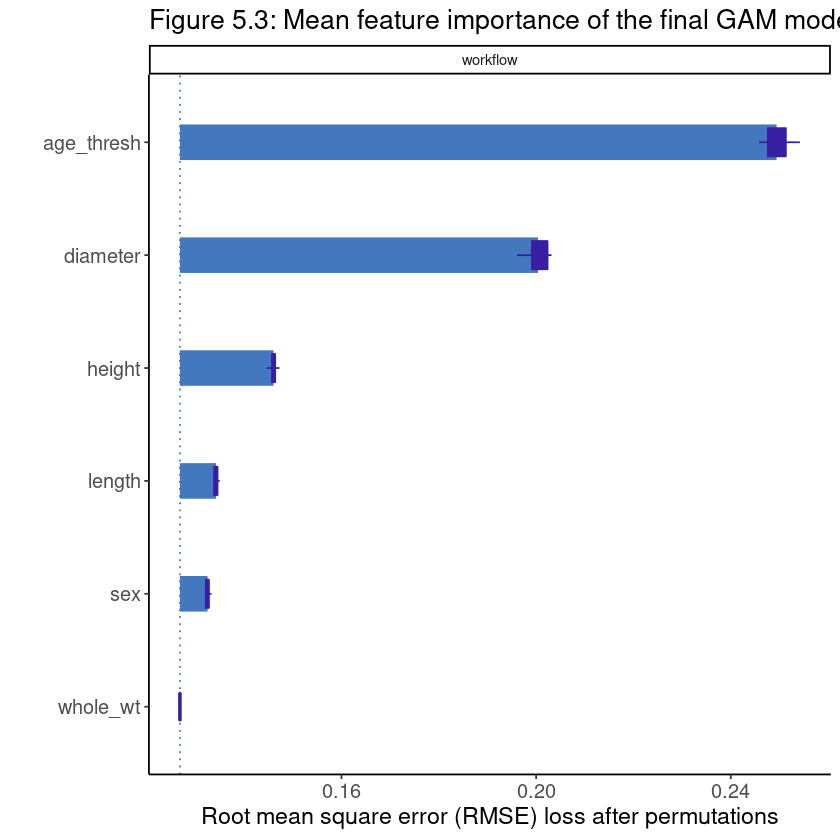

In [54]:
options(repr.plot.width=7, repr.plot.height=7)
fs_gam_explainer %>%
  model_parts(type = "raw", N = NULL) %>%
  plot() +
    labs(title = "Figure 5.3: Mean feature importance of the final GAM model",
         subtitle = NULL) +
    theme_report() +
    theme(legend.position = "none")

This plot displays the permutation-based feature importance using a RMSE loss function. It indicates that the most important variable for predicting the natural logarithm of age is the derived age-threshold indicator followed by diameter and then distantly followed by height. Length, sex and whole weight were not considered all that important to the model.

#### Partial dependence profiles

In [55]:
set.seed(22)
pdp_age_thresh <- model_profile(fs_gam_explainer, N = 100, variables = "age_thresh")
pdp_diameter <- model_profile(fs_gam_explainer, N = 100, variables = "diameter")
pdp_height <- model_profile(fs_gam_explainer, N = 100, variables = "height")
pdp_length <- model_profile(fs_gam_explainer, N = 100, variables = "length")
pdp_sex <- model_profile(fs_gam_explainer, N = 100, variables = "sex")
pdp_whole_wt <- model_profile(fs_gam_explainer, N = 100, variables = "whole_wt")

'variable_type' changed to 'categorical' due to lack of numerical variables.



In [56]:
ggplot_pdp <- function(obj, x) {
  
  p <- 
    as_tibble(obj$agr_profiles) %>%
    mutate(`_label_` = stringr::str_remove(`_label_`, "^[^_]*_")) %>%
    ggplot(aes(`_x_`, `_yhat_`)) +
    geom_line(data = as_tibble(obj$cp_profiles),
              aes(x = {{ x }}, group = `_ids_`),
              size = 0.5, alpha = 0.05, color = "gray50")
  
  num_colors <- n_distinct(obj$agr_profiles$`_label_`)
  
  if (num_colors > 1) {
    p <- p + geom_line(aes(color = `_label_`), size = 1.2, alpha = 0.8) + theme_report()
  } else {
    p <- p + geom_line(color = "dark cyan", size = 1.2, alpha = 0.8) + theme_report()
  }
  
  p
}

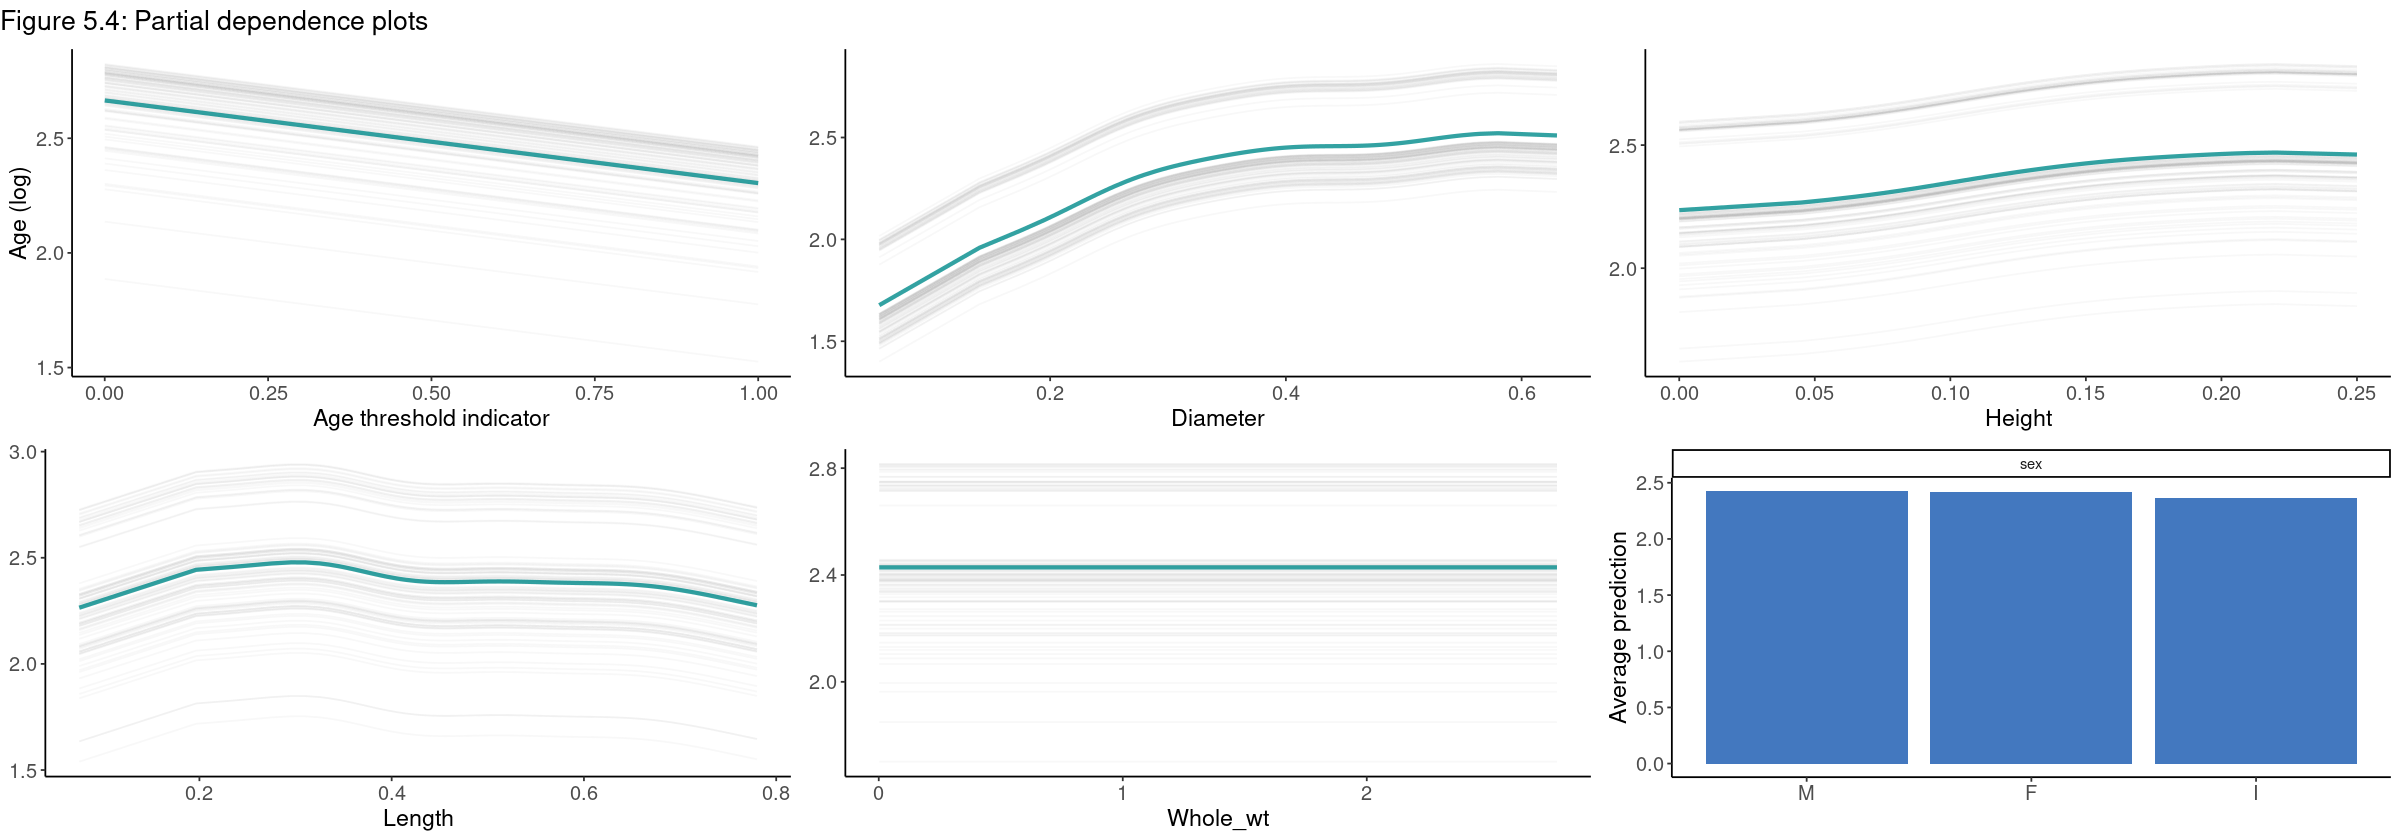

In [57]:
p1 <- ggplot_pdp(pdp_age_thresh, age_thresh) +
  labs(x = "Age threshold indicator",
       y = "Age (log)",
       color = NULL)

p2 <- ggplot_pdp(pdp_diameter, diameter) +
  labs(x = "Diameter",
       y = NULL,
       color = NULL)

p3 <- ggplot_pdp(pdp_height, height) +
  labs(x = "Height",
       y = NULL,
       color = NULL)

p4 <- ggplot_pdp(pdp_length, length) +
  labs(x = "Length",
       y = NULL,
       color = NULL)

p5 <- ggplot_pdp(pdp_whole_wt, whole_wt) +
  labs(x = "Whole_wt",
       y = NULL,
       color = NULL)

p6 <- plot(pdp_sex) +
  labs(y = "Average prediction", title = NULL, subtitle = NULL) +
  theme_report()

options(repr.plot.width=20, repr.plot.height=7)
plot_row <- ggpubr::ggarrange(p1, p2, p3, p4, p5, p6, nrow = 2, ncol = 3)
title <- ggdraw() + draw_label("Figure 5.4: Partial dependence plots", x = 0, hjust = 0, size = 16)
plot_grid(title, plot_row, ncol = 1, rel_heights = c(0.05, 1))

These plots indicate that as diameter increases, age also increases but at an ever decreasing rate; that age only has a very slight positive relationship with height; that weight has no impact on age, and that age interestingly has a slightly negative relationship.

# Appendix A - Model Diagnostics - gam_fs

In [58]:
# get the models and output
fs_gam_mod <- extract_fit_engine(final_fs_gam)
fs_output <- fs_gam_mod %>% summary()
fs_output


Family: gaussian 
Link function: identity 

Formula:
ln_age ~ sex_I + sex_F + age_thresh + s(length) + s(diameter) + 
    s(height) + s(whole_wt)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.694997   0.005702 472.634   <2e-16 ***
sex_I       -0.060520   0.006316  -9.583   <2e-16 ***
sex_F       -0.005691   0.005400  -1.054    0.292    
age_thresh  -0.360552   0.005712 -63.121   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                  edf Ref.df     F p-value    
s(length)   6.691e+00      9 1.846 0.00368 ** 
s(diameter) 6.240e+00      9 4.358 < 2e-16 ***
s(height)   3.115e+00      9 7.676 < 2e-16 ***
s(whole_wt) 9.324e-06      9 0.000 0.43217    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.782   Deviance explained = 78.4%
GCV = 0.01627  Scale est. = 0.016174  n = 3333

The output above presents the models results. The parametric coefficients are those for which smoothing was not desired such as explanatory variables known to have a linear relationship with the outcome variable or indicator/dummy variables. This output is interpreted exactly the same as for a linear regression. The next section covers the smooth terms. Coefficients are not included because each smooth term has several coefficients, one for each basis function (and in this case there are nine for each term). The EDF or effective degrees of freedom represents the complexity of the smooth, where a value of one is equivalent to a linear relationship, 2 is equivalent to a quadratic and so on. For the abalone data, length, diameter and height were fitted as non-linear and significant, but whole weight was fitted as linear and insignificant.

The partial effect plots represent this information graphically. They can also be used to assess whether a smooth term should be included. The data points are the partial residuals, which for a smooth term are the residuals that would be obtained from dropping the term concerned from the model, whilst leaving all other estimates fixed. The plots below indicate that height could also potentially be modelled as a linear relationship.

[1] "Figure A.1: Partial effect plots"


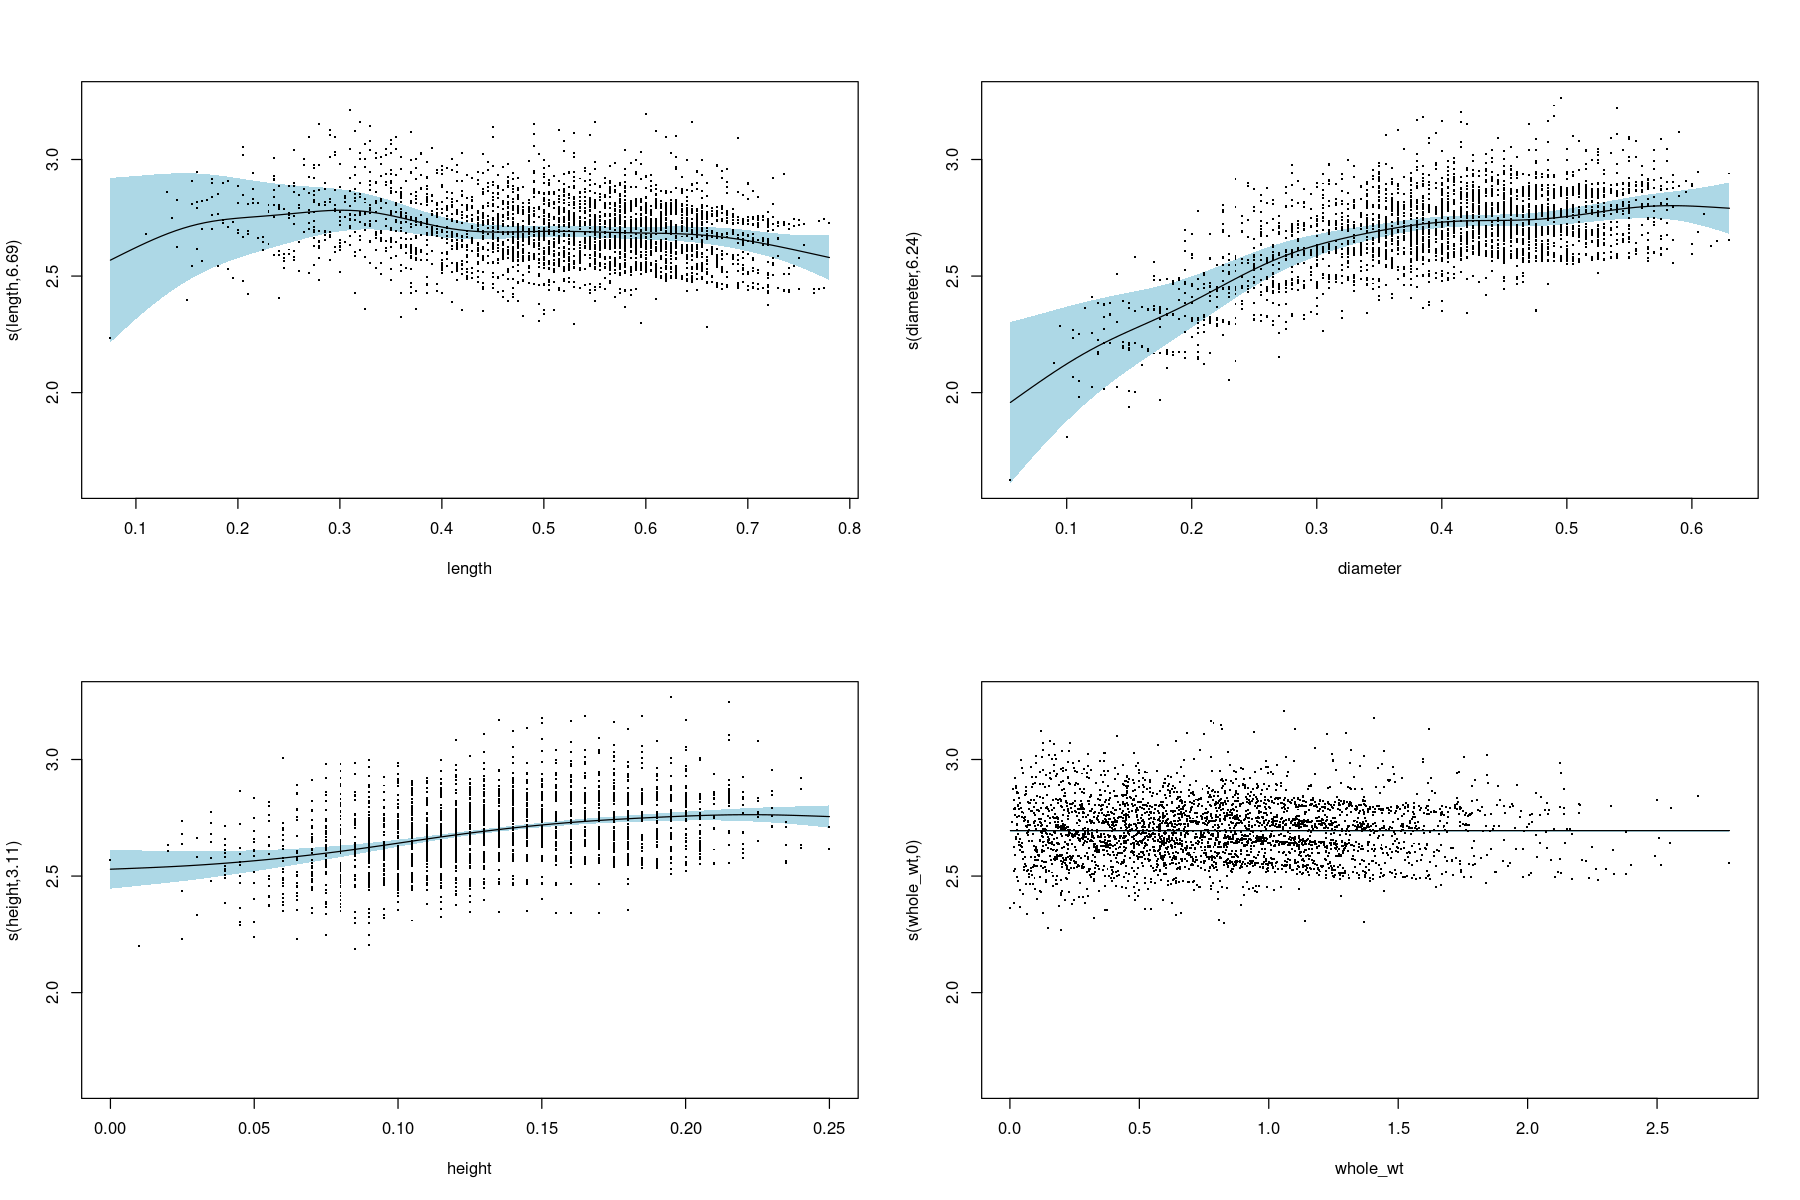

In [59]:
# partial effect plots
options(repr.plot.width=15, repr.plot.height=10)
print("Figure A.1: Partial effect plots")
plot(fs_gam_mod, rug = FALSE, shade = TRUE, residuals = TRUE, cex = 2, shade.col = "lightblue", seWithMean = TRUE,
     shift = coef(fs_gam_mod)[1], pages = 1)

Another method of assessing model quality is using the output presented below. The second half of the non-graphical output is the results of a test to determine if the dimensions of the smooth terms are too low; that is, if there are too few basis functions. In this case, it indicates that there are problems with the length, diameter and height terms. Future work to fix this issue should focus on the term with the highest edf relative to the number of basis functions (k) until each p-value is no longer significant or at least not strongly significant as small p-values indicate non-randomly distributed residuals.

The plots below provide different ways of looking at the model residuals. A well-fitting model should have the residuals on a straight line. This model is not too bad, but there are more significant deviations at the tails of the distribution. The histogram on the bottom-left should resemble a bell-shape, which this does. On the top right, the residuals should be evenly distributed around zero, which this plot is clearly deviating from. On the bottom right, the points should lie on a straight diagonal line or as close to as possible.


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 10 iterations.
The RMS GCV score gradient at convergence was 6.232143e-07 .
The Hessian was not positive definite.
Model rank =  40 / 40 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                  k'      edf k-index p-value    
s(length)   9.00e+00 6.69e+00    0.93  <2e-16 ***
s(diameter) 9.00e+00 6.24e+00    0.93  <2e-16 ***
s(height)   9.00e+00 3.11e+00    0.89  <2e-16 ***
s(whole_wt) 9.00e+00 9.32e-06    0.99    0.29    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


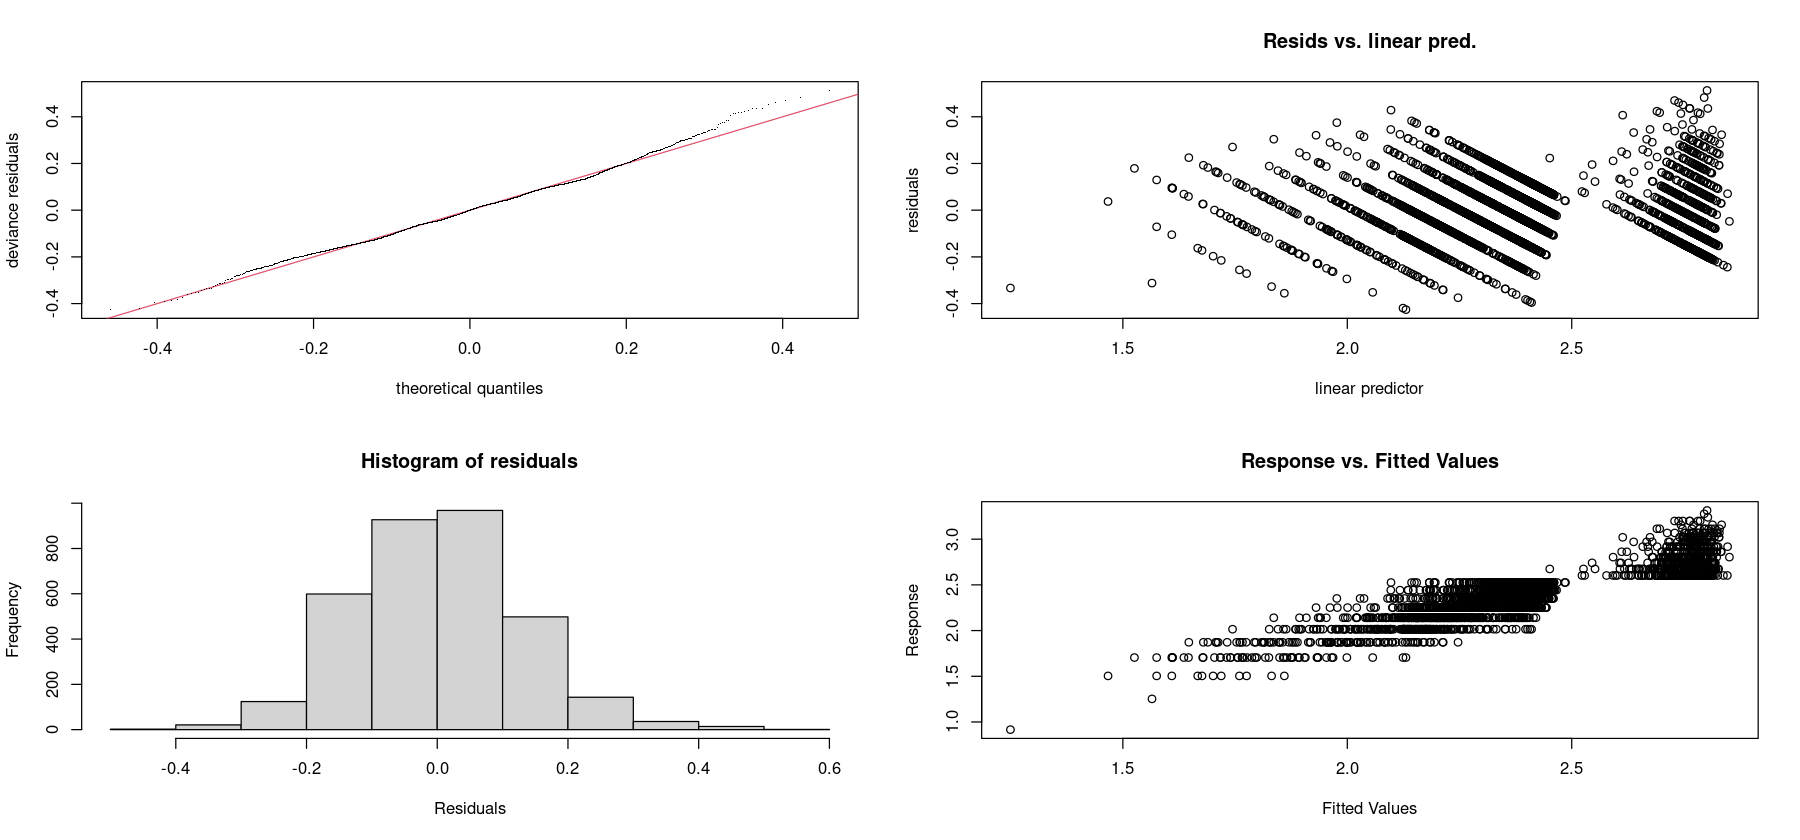

In [60]:
options(repr.plot.width=15, repr.plot.height=7)
gam.check(fs_gam_mod)

Concurvity is an important concept in GAM modelling. Not only is it important to ensure that explanatory variables are not collinear or highly correlated, they need to not have concurvity. Concurvity occurs when one explanatory variable is a smooth curve of another. If both are used in a model then smooths with wild confidence intervals are produced. The first table reports the overall concurvity for each smooth, or how much each smooth is predetermined by all the other smooths. As is clear from the values in the table, concurvity is clearly a problem.

The second set of tables returns matrices of pairwise concurvities, which show the degree to which each variable is predetermined by each other variable, rather than all the other variables. These can be used to identify which variables have a close relationships (which in this case is all of them.)

In [61]:
concurvity(fs_gam_mod, full = TRUE)
concurvity(fs_gam_mod, full = FALSE)

para      s(length) s(diameter) s(height) s(whole_wt)
worst    0.8551507 0.9905186 0.9887915   0.9169291 0.9813085  
observed 0.8551507 0.9566282 0.9868940   0.8953742 0.9571444  
estimate 0.8551507 0.9657277 0.9644915   0.7767117 0.8982469

$worst
                    para    s(length)  s(diameter)    s(height)  s(whole_wt)
para        1.000000e+00 6.214085e-26 4.183118e-22 5.584039e-25 2.173390e-27
s(length)   6.327627e-26 1.000000e+00 9.878820e-01 9.000033e-01 9.751918e-01
s(diameter) 4.182023e-22 9.878820e-01 1.000000e+00 9.002151e-01 9.726647e-01
s(height)   5.807030e-25 9.000033e-01 9.002151e-01 1.000000e+00 9.117233e-01
s(whole_wt) 3.257880e-27 9.751918e-01 9.726647e-01 9.117233e-01 1.000000e+00

$observed
                    para    s(length)  s(diameter)    s(height)  s(whole_wt)
para        1.000000e+00 1.866817e-28 2.312819e-26 5.545303e-31 8.900585e-31
s(length)   6.327627e-26 1.000000e+00 9.855803e-01 8.623635e-01 9.381370e-01
s(diameter) 4.182023e-22 9.483420e-01 1.000000e+00 8.692000e-01 9.366292e-01
s(height)   5.807030e-25 7.559977e-01 8.932339e-01 1.000000e+00 8.332030e-01
s(whole_wt) 3.257880e-27 8.461990e-01 9.621624e-01 8.909045e-01 1.000000e+00

$estimate
                    para    s(length)  s(diameter)    s(height)  s(whole_wt)
para        1.000000e+00 4.859051e-28 1.373070e-24 3.251756e-27 1.221725e-30
s(length)   6.327627e-26 1.000000e+00 9.589767e-01 7.152012e-01 8.689243e-01
s(diameter) 4.182023e-22 9.585393e-01 1.000000e+00 7.310174e-01 8.596122e-01
s(height)   5.807030e-25 7.876272e-01 7.997060e-01 1.000000e+00 7.034049e-01
s(whole_wt) 3.257880e-27 9.184239e-01 9.194884e-01 7.586330e-01 1.000000e+00

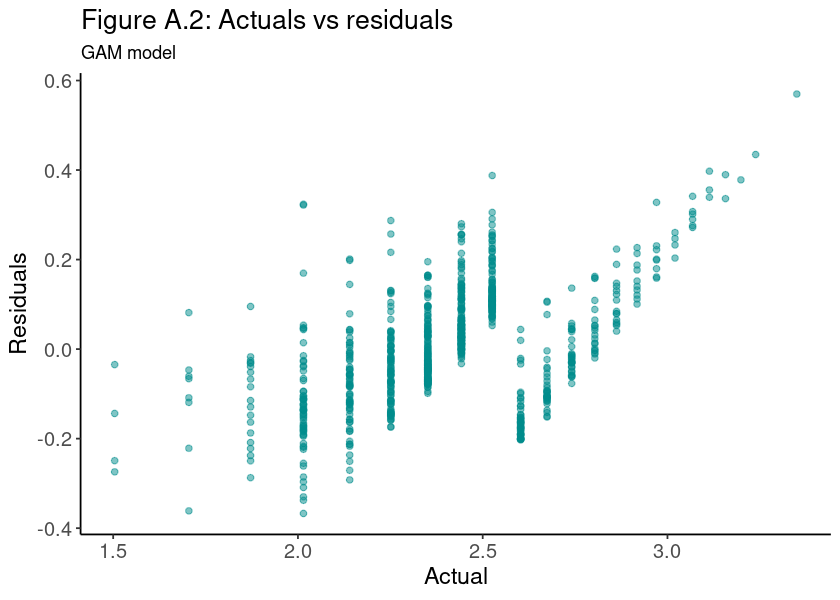

In [62]:
options(repr.plot.width=7, repr.plot.height=5)
collect_predictions(final_fs_gam) %>%
  mutate(.resid = ln_age - .pred) %>%
  ggplot(aes(x = ln_age, y = .resid)) + 
    geom_point(colour = "dark cyan", alpha = 0.5) + 
    labs(x = "Actual",
         y = "Residuals",
         title = "Figure A.2: Actuals vs residuals",
         subtitle = "GAM model") +
    theme_report()

# Appendix B - Model Diagnostics - gam_r

In [63]:
best_r_wflow_fit <- extract_workflow(final_r_gam)

set.seed(22)
r_gam_explainer <- explain_tidymodels(
    best_r_wflow_fit,
    data = train_data %>% dplyr::select(-ln_age),
    y = train_data$ln_age,
    verbose = FALSE)

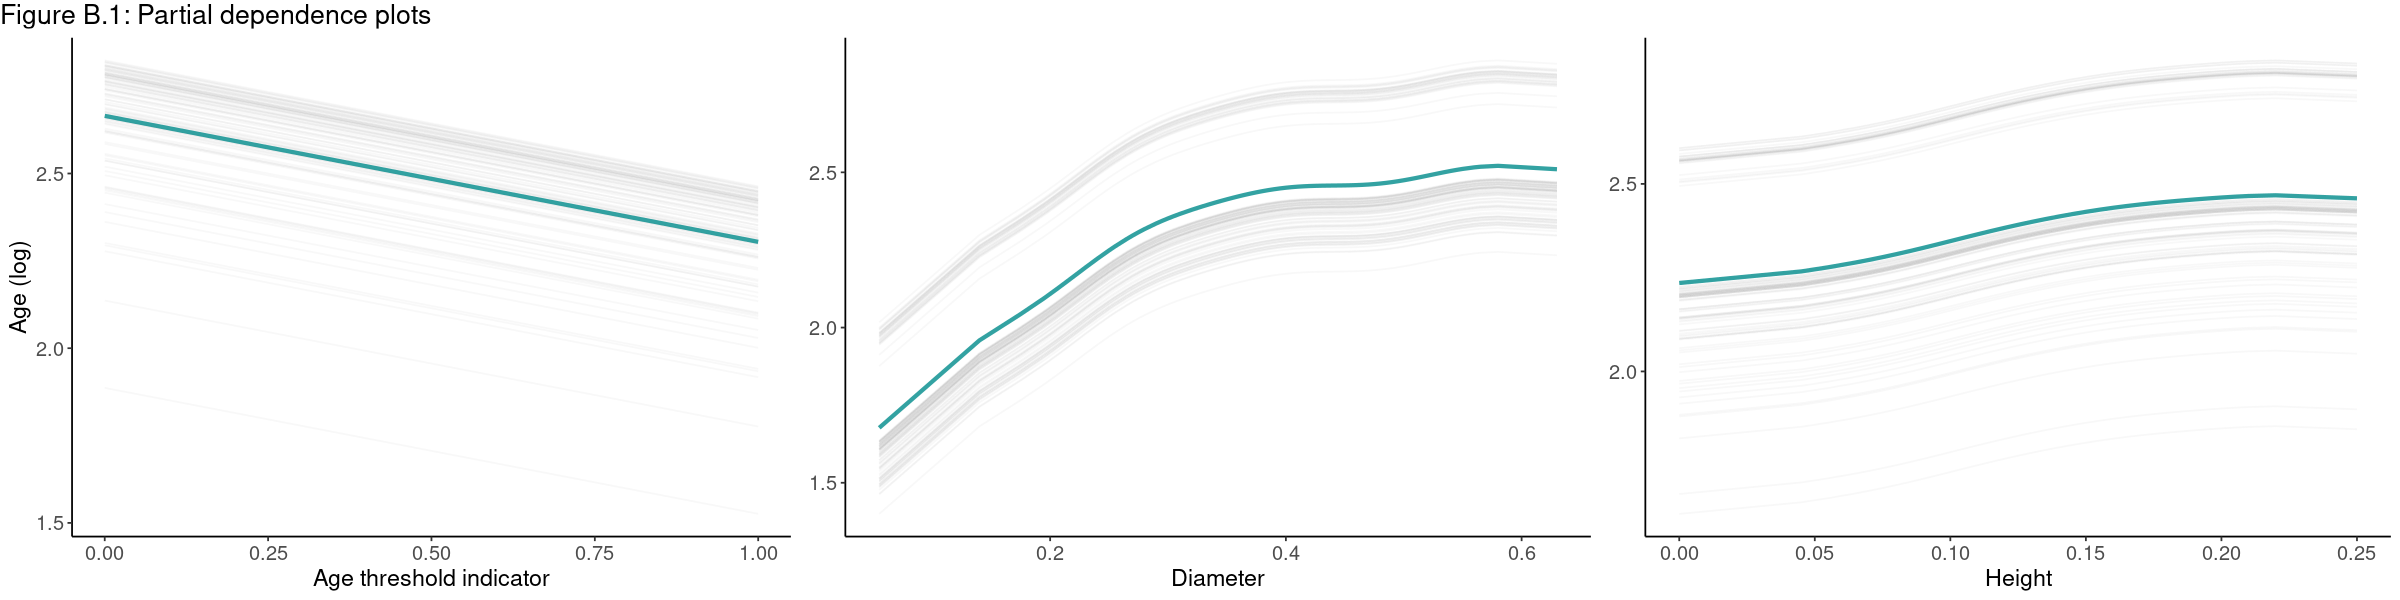

In [64]:
set.seed(22)
pdp_age_thresh <- model_profile(fs_gam_explainer, N = 100, variables = "age_thresh")
pdp_diameter <- model_profile(fs_gam_explainer, N = 100, variables = "diameter")
pdp_height <- model_profile(fs_gam_explainer, N = 100, variables = "height")

p1 <- ggplot_pdp(pdp_age_thresh, age_thresh) +
  labs(x = "Age threshold indicator",
       y = "Age (log)",
       color = NULL)

p2 <- ggplot_pdp(pdp_diameter, diameter) +
  labs(x = "Diameter",
       y = NULL,
       color = NULL)

p3 <- ggplot_pdp(pdp_height, height) +
  labs(x = "Height",
       y = NULL,
       color = NULL)

options(repr.plot.width=20, repr.plot.height=5)
plot_row <- ggpubr::ggarrange(p1, p2, p3, nrow = 1, ncol = 3)
title <- ggdraw() + draw_label("Figure B.1: Partial dependence plots", x = 0, hjust = 0, size = 16)
plot_grid(title, plot_row, ncol = 1, rel_heights = c(0.05, 1))

In [65]:
# get the models and output
r_gam_mod <- extract_fit_engine(final_r_gam)
r_output <- r_gam_mod %>% summary()
r_output


Family: gaussian 
Link function: identity 

Formula:
ln_age ~ age_thresh + s(diameter) + s(height)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.680219   0.004954   541.0   <2e-16 ***
age_thresh  -0.368291   0.005746   -64.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(diameter) 8.479  8.901 25.95  <2e-16 ***
s(height)   2.788  3.659 27.07  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.778   Deviance explained = 77.9%
GCV = 0.016869  Scale est. = 0.016799  n = 3333

[1] "Figure B.2: Partial effect plots"


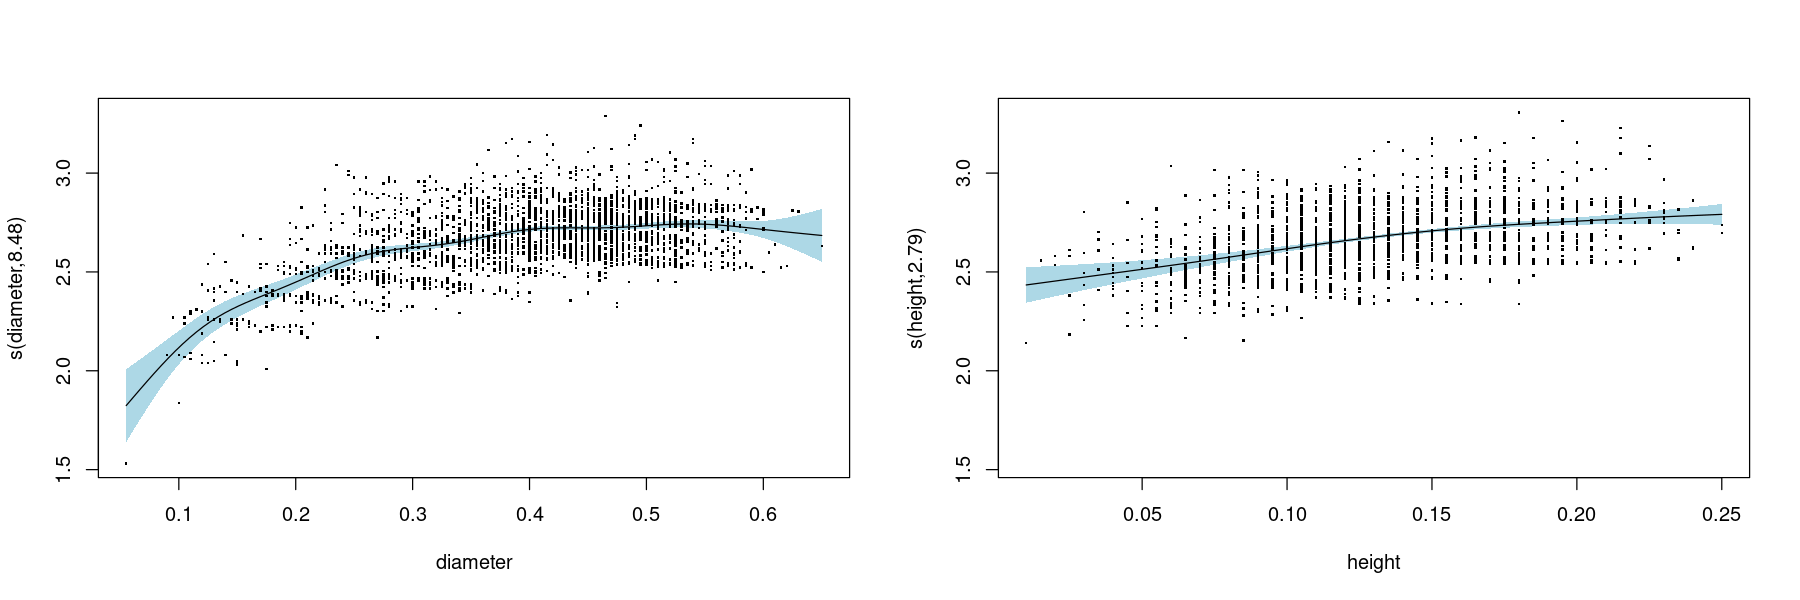

In [66]:
# partial effect plots
options(repr.plot.width=15, repr.plot.height=5)
print("Figure B.2: Partial effect plots")
plot(r_gam_mod, rug = FALSE, shade = TRUE, residuals = TRUE, cex = 2, shade.col = "lightblue", seWithMean = TRUE,
     shift = coef(r_gam_mod)[1], pages = 1)


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 6 iterations.
The RMS GCV score gradient at convergence was 2.286154e-07 .
The Hessian was positive definite.
Model rank =  20 / 20 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

              k'  edf k-index p-value
s(diameter) 9.00 8.48    0.98    0.17
s(height)   9.00 2.79    1.01    0.61


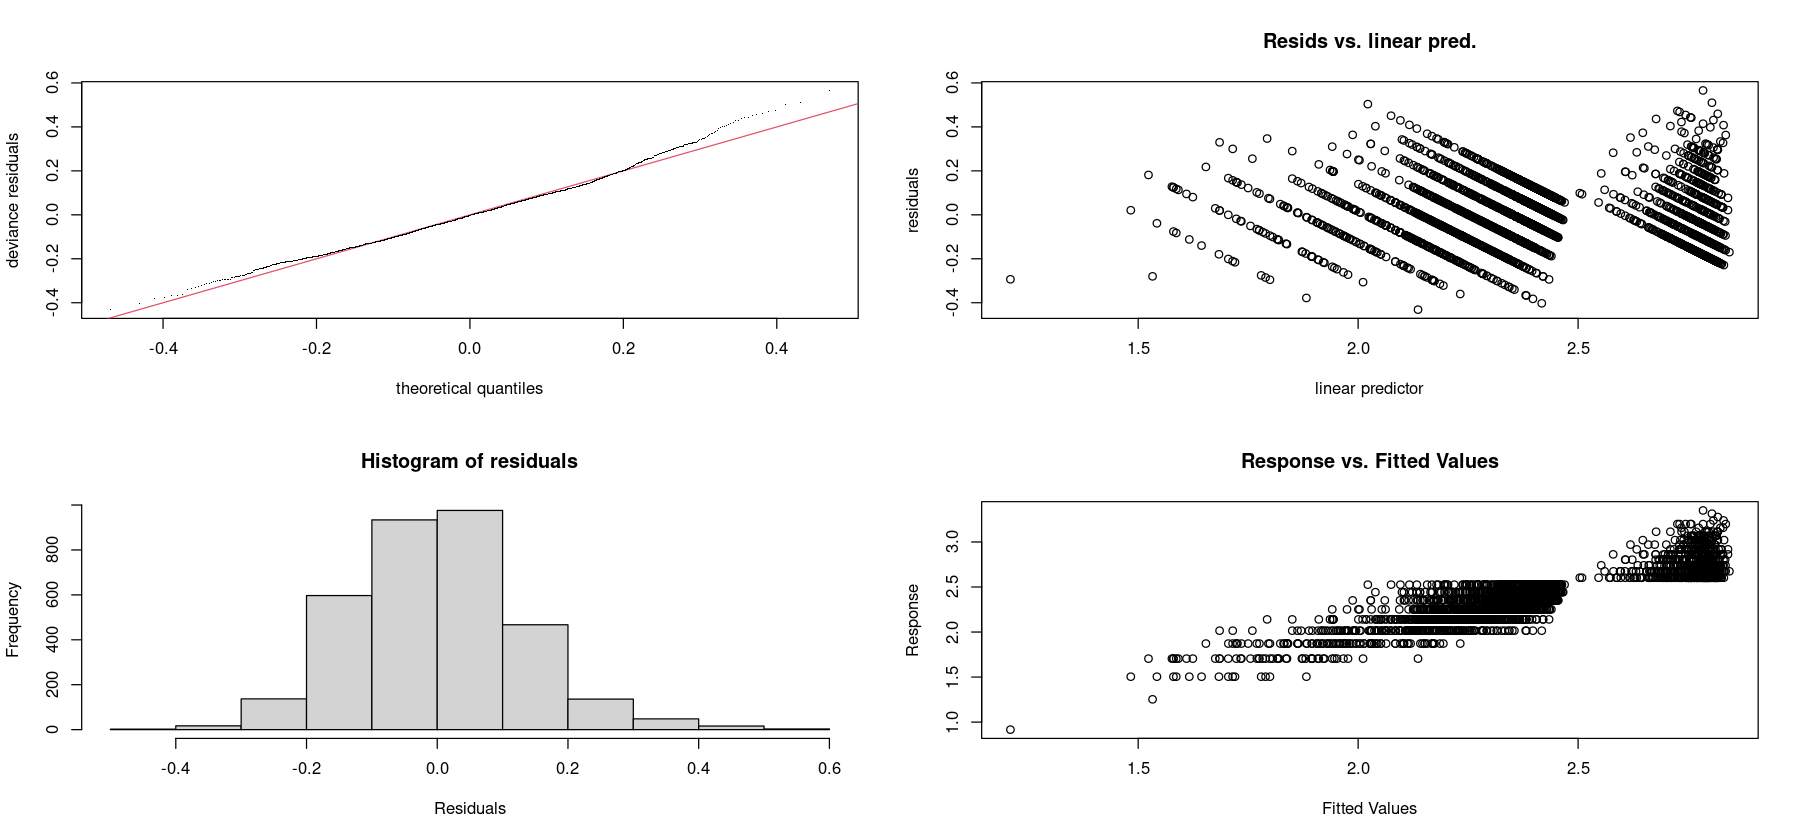

In [67]:
options(repr.plot.width=15, repr.plot.height=7)
gam.check(r_gam_mod)

In [68]:
concurvity(r_gam_mod, full = TRUE)
concurvity(r_gam_mod, full = FALSE)

para      s(diameter) s(height)
worst    0.7953461 0.8990321   0.8999502
observed 0.7953461 0.8888640   0.8729729
estimate 0.7953461 0.7964787   0.7413268

$worst
                    para  s(diameter)    s(height)
para        1.000000e+00 2.959751e-23 2.990436e-25
s(diameter) 2.961674e-23 1.000000e+00 8.990310e-01
s(height)   3.063203e-25 8.990310e-01 1.000000e+00

$observed
                    para  s(diameter)    s(height)
para        1.000000e+00 8.726692e-26 8.949322e-31
s(diameter) 2.961674e-23 1.000000e+00 8.681727e-01
s(height)   3.063203e-25 8.888633e-01 1.000000e+00

$estimate
                    para  s(diameter)    s(height)
para        1.000000e+00 8.387980e-26 5.515624e-28
s(diameter) 2.961674e-23 1.000000e+00 7.348235e-01
s(height)   3.063203e-25 7.960948e-01 1.000000e+00

# Appendix C - Competition Brief
**Can you estimate the age of an abalone?**

📖 **Background**
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

💾 **The data**
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

*Abalone characteristics:*
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

💪 **Competition challenge**
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

🧑‍⚖️ **Judging criteria**

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

✅ **Checklist before publishing**
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Check that all the cells run without error.

⌛️ **Time is ticking. Good luck!**